# Import Library

In [1]:
import pandas as pd # Library untuk DataFrame
import numpy as np # Library untuk matematika
import seaborn as sns # Library untuk Visualisasi
import matplotlib.pyplot as plt # Library untuk visualisasi
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
#library untuk analisa time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Library forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [2]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


#Data Perparation

DF1

In [3]:
df1 = pd.read_excel('/content/Drive/MyDrive/Colab Notebooks/DigitalSkola/Internship Deepublish/Dataset Internship Deepublish.xls', sheet_name = 'orderds')
df1.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
1                                 Lingkungan Tambang    1.0   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
3                                  Hukum Waris Islam    1.0   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   

                                              alamat notelp          provinsi  \
0  Rona Uli Pandiangan \n6281268544179 \nBengkel ...    NaN    Sumatera Utara   
1  Penerima\nNur sabono\nJalan Reremi Puncak bela...    NaN             Papua   
2  Penerima\nHafizah Suryani, 6285837893026\nLapa...    NaN    Sumatera Barat   
3  Penerima\nTyo,6282185930712\nPerumnas Talang K...    NaN  Sumatera Selatan   
4  Ibu Yana\n081280922156\nJalan Mandala Utara VI...    NaN       DKI Jakarta   

              kategori1             kategori2 kategori3 tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi       NaN  2021   
1   SAINS dan TEKNOLOGI          Pertambangan       NaN  2021   
2                  MIPA               BIOLOGI       NaN  2018   
3  SOSIAL dan HUMANIORA           Hukum Islam       NaN  2021   
4    EKONOMI dan BISNIS             Manajemen       NaN  2017   

                                  penulis               isbn  \
0                               Supriyadi  978-623-02-2629-8   
1                   Joni Safaat Adiansyah  978-623-02-3254-1   
2                           Linda Advinda  978-602-453-625-1   
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7   
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1   

                        kabupaten       sku  
0                      Kota Medan  DP04854A  
1             Kabupaten Manokwari  DP05260A  
2  Kabupaten Lima Puluh Koto/Kota  DP01973A  
3                  Kota Palembang  DP05273A  
4              Kota Jakarta Barat  DP01443A

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   deadline   65333 non-null  datetime64[ns]
 1   pic        64070 non-null  object        
 2   reseller   61018 non-null  object        
 3   judul      65385 non-null  object        
 4   order      65243 non-null  float64       
 5   alamat     60898 non-null  object        
 6   notelp     28490 non-null  object        
 7   provinsi   45339 non-null  object        
 8   kategori1  63742 non-null  object        
 9   kategori2  63723 non-null  object        
 10  kategori3  34 non-null     object        
 11  tahun      63561 non-null  object        
 12  penulis    63753 non-null  object        
 13  isbn       63765 non-null  object        
 14  kabupaten  30600 non-null  object        
 15  sku        56972 non-null  object        
dtypes: datetime64[ns](1), float64(1), object

In [5]:
if (df1['penulis'] == '2021').any():
    print("Kolom penulis memiliki data yang berisikan tahun")
else:
    print("Kolom penulis tidak memiliki data yang berisikan tahun")

Kolom penulis memiliki data yang berisikan tahun


In [6]:
for i, row in df1.iterrows():
    # Cek apakah data pada kolom penulis adalah digit
    if str(df1.at[i, 'penulis']).isdigit():
        # Pindahkan data dari kolom penulis ke kolom tahun
        df1.at[i, 'tahun'] = df1.at[i, 'penulis']
        df1.at[i, 'penulis'] = None

In [7]:
# Cek apakah masih ada data berupa digit di kolom 12
if (df1['penulis'] == '2021').any():
    print("Kolom penulis memiliki data yang berisikan 'tahun'")
else:
    print("Kolom penulis tidak memiliki data yang berisikan 'tahun'")

Kolom penulis tidak memiliki data yang berisikan 'tahun'


In [8]:
tipe_data_isbn = df1['isbn'].dtypes
print("Tipe data kolom 'isbn':", tipe_data_isbn)

Tipe data kolom 'isbn': object


In [9]:
# Checking Null Data
df1.isnull().sum()

deadline       202
pic           1465
reseller      4517
judul          150
order          292
alamat        4637
notelp       37045
provinsi     20196
kategori1     1793
kategori2     1812
kategori3    65501
tahun         1941
penulis       1815
isbn          1770
kabupaten    34935
sku           8563
dtype: int64

In [10]:
df1['penulis'].fillna(df1['isbn'], inplace=True)

In [11]:
#Memeriksa persentase data hilang
df1.isna().mean().round(3).mul(100)

deadline      0.3
pic           2.2
reseller      6.9
judul         0.2
order         0.4
alamat        7.1
notelp       56.5
provinsi     30.8
kategori1     2.7
kategori2     2.8
kategori3    99.9
tahun         3.0
penulis       2.6
isbn          2.7
kabupaten    53.3
sku          13.1
dtype: float64

In [12]:
df1.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
1                                 Lingkungan Tambang    1.0   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
3                                  Hukum Waris Islam    1.0   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   

                                              alamat notelp          provinsi  \
0  Rona Uli Pandiangan \n6281268544179 \nBengkel ...    NaN    Sumatera Utara   
1  Penerima\nNur sabono\nJalan Reremi Puncak bela...    NaN             Papua   
2  Penerima\nHafizah Suryani, 6285837893026\nLapa...    NaN    Sumatera Barat   
3  Penerima\nTyo,6282185930712\nPerumnas Talang K...    NaN  Sumatera Selatan   
4  Ibu Yana\n081280922156\nJalan Mandala Utara VI...    NaN       DKI Jakarta   

              kategori1             kategori2 kategori3 tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi       NaN  2021   
1   SAINS dan TEKNOLOGI          Pertambangan       NaN  2021   
2                  MIPA               BIOLOGI       NaN  2018   
3  SOSIAL dan HUMANIORA           Hukum Islam       NaN  2021   
4    EKONOMI dan BISNIS             Manajemen       NaN  2017   

                                  penulis               isbn  \
0                               Supriyadi  978-623-02-2629-8   
1                   Joni Safaat Adiansyah  978-623-02-3254-1   
2                           Linda Advinda  978-602-453-625-1   
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7   
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1   

                        kabupaten       sku  
0                      Kota Medan  DP04854A  
1             Kabupaten Manokwari  DP05260A  
2  Kabupaten Lima Puluh Koto/Kota  DP01973A  
3                  Kota Palembang  DP05273A  
4              Kota Jakarta Barat  DP01443A

DF2

In [13]:
df2=pd.read_excel('/content/Drive/MyDrive/Colab Notebooks/DigitalSkola/Internship Deepublish/Dataset Internship Deepublish.xls',sheet_name = 'orderds(2)',header = None)
df2.head()

0       1                  2   \
0 2023-04-05    RS 1            Buku ID   
1 2023-04-05    RS 1           vinividi   
2        NaT     NaN                NaN   
3 2023-04-06  Retail  Shopee Deepublish   
4 2023-04-06  Retail  Shopee Deepublish   

                                                  3    4   \
0                         Selamat Datang Masa Remaja  1.0   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...  1.0   
2                                             CLOSEE  NaN   
3             Antologi Puisi Percik Api Di Sore Hari  1.0   
4                  Pelayanan Publik Berbasis Digital  1.0   

                                                  5    6            7   \
0  Penerima :\nbilqis\nKp. Seseupan, RT.3/RW.5, D...  NaN   Jawa Barat   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...  NaN          NaN   
2                                                NaN  NaN          NaN   
3  Aning Suatmini\n******53\nDesa Tunahan Rt 11 R...  NaN  Jawa Tengah   
4  Selvy Alia Destrianti\n******50\nPerum Bumi Su...  NaN   Jawa Barat   

                     8           9    10      11  \
0                  UMUM  Lain- Lain  NaN  2019.0   
1  SOSIAL dan HUMANIORA      Sosial  NaN  2021.0   
2                   NaN         NaN  NaN     NaN   
3                  UMUM       Puisi  NaN  2020.0   
4  SOSIAL dan HUMANIORA      Sosial  NaN  2022.0   

                                                  12                 13   14  \
0  Sri Bulan Musmiah, Nuryani Y. Rustaman & Saefudin  978-623-02-0460-9  NaN   
1                             Kurniawan Budi Irianto  978-623-02-2271-9  NaN   
2                                                NaN                NaN  NaN   
3                                       Sri Purwanti  978-623-02-0737-2  NaN   
4  I Nyoman Trisantosa, Dewi Kurniasih & Musa Hubeis  978-623-02-4064-5  NaN   

         15        16   17  
0       NaN       0.0  NaN  
1     231.0     231.0  NaN  
2       NaN       0.0  NaN  
3   28000.0   28000.0  NaN  
4  102000.0  102000.0  NaN

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22068 entries, 0 to 22067
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       21823 non-null  datetime64[ns]
 1   1       18245 non-null  object        
 2   2       21127 non-null  object        
 3   3       21848 non-null  object        
 4   4       21805 non-null  float64       
 5   5       17707 non-null  object        
 6   6       12055 non-null  object        
 7   7       6340 non-null   object        
 8   8       14740 non-null  object        
 9   9       15153 non-null  object        
 10  10      11145 non-null  object        
 11  11      9716 non-null   float64       
 12  12      20866 non-null  object        
 13  13      20883 non-null  object        
 14  14      862 non-null    object        
 15  15      13560 non-null  float64       
 16  16      14632 non-null  float64       
 17  17      7759 non-null   object        
dtypes: dat

In [15]:
if (df2[12] == '2021').any():
    print("Kolom ke-12 memiliki data yang berisikan 'tahun'")
else:
    print("Kolom ke-12 tidak memiliki data yang berisikan 'tahun'")

Kolom ke-12 memiliki data yang berisikan 'tahun'


In [16]:
for i, row in df2.iterrows():
    # Cek apakah data pada kolom 12 adalah digit
    if str(df2.at[i, 12]).isdigit():
        # Pindahkan data dari kolom 12 ke kolom 11
        df2.at[i, 11] = df2.at[i, 12]
        df2.at[i, 12] = None

In [17]:
# Cek apakah masih ada data berupa digit di kolom 12
if (df2[12] == '2021').any():
    print("Kolom ke-12 memiliki data yang berisikan tahun")
else:
    print("Kolom ke-12 tidak memiliki data yang berisikan tahun")

Kolom ke-12 tidak memiliki data yang berisikan tahun


In [18]:
# Checking Null Data
df2.isnull().sum()

0       245
1      3823
2       941
3       220
4       263
5      4361
6     10013
7     15728
8      7328
9      6915
10    10923
11     1222
12    12332
13     1185
14    21206
15     8508
16     7436
17    14309
dtype: int64

In [19]:
df2[12].fillna(df2[13], inplace=True)

In [20]:
#Memeriksa persentase data hilang
df2.isna().mean().round(3).mul(100)

0      1.1
1     17.3
2      4.3
3      1.0
4      1.2
5     19.8
6     45.4
7     71.3
8     33.2
9     31.3
10    49.5
11     5.5
12     5.4
13     5.4
14    96.1
15    38.6
16    33.7
17    64.8
dtype: float64

In [21]:
# Checking Null Data
df2.isnull().sum()

0       245
1      3823
2       941
3       220
4       263
5      4361
6     10013
7     15728
8      7328
9      6915
10    10923
11     1222
12     1184
13     1185
14    21206
15     8508
16     7436
17    14309
dtype: int64

In [22]:
df2.head()

0       1                  2   \
0 2023-04-05    RS 1            Buku ID   
1 2023-04-05    RS 1           vinividi   
2        NaT     NaN                NaN   
3 2023-04-06  Retail  Shopee Deepublish   
4 2023-04-06  Retail  Shopee Deepublish   

                                                  3    4   \
0                         Selamat Datang Masa Remaja  1.0   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...  1.0   
2                                             CLOSEE  NaN   
3             Antologi Puisi Percik Api Di Sore Hari  1.0   
4                  Pelayanan Publik Berbasis Digital  1.0   

                                                  5    6            7   \
0  Penerima :\nbilqis\nKp. Seseupan, RT.3/RW.5, D...  NaN   Jawa Barat   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...  NaN          NaN   
2                                                NaN  NaN          NaN   
3  Aning Suatmini\n******53\nDesa Tunahan Rt 11 R...  NaN  Jawa Tengah   
4  Selvy Alia Destrianti\n******50\nPerum Bumi Su...  NaN   Jawa Barat   

                     8           9    10      11  \
0                  UMUM  Lain- Lain  NaN  2019.0   
1  SOSIAL dan HUMANIORA      Sosial  NaN  2021.0   
2                   NaN         NaN  NaN     NaN   
3                  UMUM       Puisi  NaN  2020.0   
4  SOSIAL dan HUMANIORA      Sosial  NaN  2022.0   

                                                  12                 13   14  \
0  Sri Bulan Musmiah, Nuryani Y. Rustaman & Saefudin  978-623-02-0460-9  NaN   
1                             Kurniawan Budi Irianto  978-623-02-2271-9  NaN   
2                                                NaN                NaN  NaN   
3                                       Sri Purwanti  978-623-02-0737-2  NaN   
4  I Nyoman Trisantosa, Dewi Kurniasih & Musa Hubeis  978-623-02-4064-5  NaN   

         15        16   17  
0       NaN       0.0  NaN  
1     231.0     231.0  NaN  
2       NaN       0.0  NaN  
3   28000.0   28000.0  NaN  
4  102000.0  102000.0  NaN

##Append Df1 & Df2

In [23]:
df2.drop(columns=[15, 16], inplace=True)

In [24]:
df2.head()

0       1                  2   \
0 2023-04-05    RS 1            Buku ID   
1 2023-04-05    RS 1           vinividi   
2        NaT     NaN                NaN   
3 2023-04-06  Retail  Shopee Deepublish   
4 2023-04-06  Retail  Shopee Deepublish   

                                                  3    4   \
0                         Selamat Datang Masa Remaja  1.0   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...  1.0   
2                                             CLOSEE  NaN   
3             Antologi Puisi Percik Api Di Sore Hari  1.0   
4                  Pelayanan Publik Berbasis Digital  1.0   

                                                  5    6            7   \
0  Penerima :\nbilqis\nKp. Seseupan, RT.3/RW.5, D...  NaN   Jawa Barat   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...  NaN          NaN   
2                                                NaN  NaN          NaN   
3  Aning Suatmini\n******53\nDesa Tunahan Rt 11 R...  NaN  Jawa Tengah   
4  Selvy Alia Destrianti\n******50\nPerum Bumi Su...  NaN   Jawa Barat   

                     8           9    10      11  \
0                  UMUM  Lain- Lain  NaN  2019.0   
1  SOSIAL dan HUMANIORA      Sosial  NaN  2021.0   
2                   NaN         NaN  NaN     NaN   
3                  UMUM       Puisi  NaN  2020.0   
4  SOSIAL dan HUMANIORA      Sosial  NaN  2022.0   

                                                  12                 13   14  \
0  Sri Bulan Musmiah, Nuryani Y. Rustaman & Saefudin  978-623-02-0460-9  NaN   
1                             Kurniawan Budi Irianto  978-623-02-2271-9  NaN   
2                                                NaN                NaN  NaN   
3                                       Sri Purwanti  978-623-02-0737-2  NaN   
4  I Nyoman Trisantosa, Dewi Kurniasih & Musa Hubeis  978-623-02-4064-5  NaN   

    17  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [25]:
df1.shape

(65535, 16)

In [26]:
df2.shape

(22068, 16)

In [27]:
df1.columns

Index(['deadline', 'pic', 'reseller', 'judul', 'order', 'alamat', 'notelp',
       'provinsi', 'kategori1', 'kategori2', 'kategori3', 'tahun', 'penulis',
       'isbn', 'kabupaten', 'sku'],
      dtype='object')

In [28]:
df2.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17], dtype='int64')

In [29]:
df2.rename(columns = {0:'deadline',
                      1:'pic',
                      2:'reseller',
                      3:'judul',
                      4:'order',
                      5:'alamat',
                      6:'notelp',
                      7:'provinsi',
                      8:'kategori1',
                      9:'kategori2',
                      10:'kategori3',
                      11:'tahun',
                      12:'penulis',
                      13:'isbn',
                      14:'kabupaten',
                      17:'sku'}, inplace = True)
df2.head()

deadline     pic           reseller  \
0 2023-04-05    RS 1            Buku ID   
1 2023-04-05    RS 1           vinividi   
2        NaT     NaN                NaN   
3 2023-04-06  Retail  Shopee Deepublish   
4 2023-04-06  Retail  Shopee Deepublish   

                                               judul  order  \
0                         Selamat Datang Masa Remaja    1.0   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...    1.0   
2                                             CLOSEE    NaN   
3             Antologi Puisi Percik Api Di Sore Hari    1.0   
4                  Pelayanan Publik Berbasis Digital    1.0   

                                              alamat notelp     provinsi  \
0  Penerima :\nbilqis\nKp. Seseupan, RT.3/RW.5, D...    NaN   Jawa Barat   
1  Kumpulan Catatan, Pengaturan-Pengaturan, Serta...    NaN          NaN   
2                                                NaN    NaN          NaN   
3  Aning Suatmini\n******53\nDesa Tunahan Rt 11 R...    NaN  Jawa Tengah   
4  Selvy Alia Destrianti\n******50\nPerum Bumi Su...    NaN   Jawa Barat   

              kategori1   kategori2 kategori3   tahun  \
0                  UMUM  Lain- Lain       NaN  2019.0   
1  SOSIAL dan HUMANIORA      Sosial       NaN  2021.0   
2                   NaN         NaN       NaN     NaN   
3                  UMUM       Puisi       NaN  2020.0   
4  SOSIAL dan HUMANIORA      Sosial       NaN  2022.0   

                                             penulis               isbn  \
0  Sri Bulan Musmiah, Nuryani Y. Rustaman & Saefudin  978-623-02-0460-9   
1                             Kurniawan Budi Irianto  978-623-02-2271-9   
2                                                NaN                NaN   
3                                       Sri Purwanti  978-623-02-0737-2   
4  I Nyoman Trisantosa, Dewi Kurniasih & Musa Hubeis  978-623-02-4064-5   

  kabupaten  sku  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN

In [30]:
df=df1.append(df2)

<ipython-input-30-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [31]:
df.shape

(87603, 16)

In [32]:
df.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
1                                 Lingkungan Tambang    1.0   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
3                                  Hukum Waris Islam    1.0   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   

                                              alamat notelp          provinsi  \
0  Rona Uli Pandiangan \n6281268544179 \nBengkel ...    NaN    Sumatera Utara   
1  Penerima\nNur sabono\nJalan Reremi Puncak bela...    NaN             Papua   
2  Penerima\nHafizah Suryani, 6285837893026\nLapa...    NaN    Sumatera Barat   
3  Penerima\nTyo,6282185930712\nPerumnas Talang K...    NaN  Sumatera Selatan   
4  Ibu Yana\n081280922156\nJalan Mandala Utara VI...    NaN       DKI Jakarta   

              kategori1             kategori2 kategori3 tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi       NaN  2021   
1   SAINS dan TEKNOLOGI          Pertambangan       NaN  2021   
2                  MIPA               BIOLOGI       NaN  2018   
3  SOSIAL dan HUMANIORA           Hukum Islam       NaN  2021   
4    EKONOMI dan BISNIS             Manajemen       NaN  2017   

                                  penulis               isbn  \
0                               Supriyadi  978-623-02-2629-8   
1                   Joni Safaat Adiansyah  978-623-02-3254-1   
2                           Linda Advinda  978-602-453-625-1   
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7   
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1   

                        kabupaten       sku  
0                      Kota Medan  DP04854A  
1             Kabupaten Manokwari  DP05260A  
2  Kabupaten Lima Puluh Koto/Kota  DP01973A  
3                  Kota Palembang  DP05273A  
4              Kota Jakarta Barat  DP01443A

In [33]:
df.tail()

deadline     pic                             reseller  \
22063 2022-02-02    RS 1                              omviral   
22064 2022-02-02    RS 1                        buku palasari   
22065 2022-02-02    RS 1                              omviral   
22066 2022-02-02  Retail                        Deepublish WA   
22067 2022-02-18    RS 1  Akademi Reseller Djawara Deepublish   

                                                   judul  order  \
22063       Buku Ajar Entomologi dan Pengendalian Vektor    1.0   
22064                               Kumpulan Cerita Anak    1.0   
22065                           Modul Praktikum Robotika    1.0   
22066  Analisis Rasionalitas Antibiotik di Fasilitas ...    1.0   
22067  Sayur dan Buah Berwarna Hijau di Lingkungan Ru...    1.0   

                                                  alamat notelp  \
22063  doni kurniawan, 6281229117675\nperumahan bumi ...    NaN   
22064  Desiyani Lina Rahman (6282262762730)\nJalan Sh...    NaN   
22065  dude ismail (6285777004504)\nvilla bekasi inda...    NaN   
22066  Aditya Maulana Perdana Putra\r\nJalan Simpang ...    NaN   
22067                                                  -    NaN   

                 provinsi                 kategori1             kategori2  \
22063          Jawa Barat  KESEHATAN dan KEDOKTERAN  Kesehatan Masyarakat   
22064          Jawa Barat                      UMUM                Cerpen   
22065          Jawa Barat       SAINS dan TEKNOLOGI        Teknik Elektro   
22066  Kalimantan Selatan  KESEHATAN dan KEDOKTERAN       Kedokteran umum   
22067                 NaN  KESEHATAN dan KEDOKTERAN       Kedokteran umum   

      kategori3   tahun                                            penulis  \
22063       NaN  2017.0  Denai Wahyuni, Makomulamin, dan Nila Puspita Sari   
22064       NaN  2021.0                                S.S. Dewi Anggraeni   
22065       NaN  2018.0             Eko Aris Budi Cahyono dan Agus Siswoyo   
22066       NaN  2021.0                                     Sunandar Ihsan   
22067       NaN  2022.0                       Dewi Ratih Handayani…[et.al]   

                    isbn           kabupaten       sku  
22063  978-602-453-541-4  Kabupaten Karawang  DP01916A  
22064  978-623-02-2685-4        Kota Bandung  DP04911A  
22065  978-602-475-936-0    Kabupaten Bekasi  DP02650A  
22066  978-623-02-3706-5    Kota Banjarmasin  DP05522A  
22067  978-623-02-3972-4                 NaN  DP05804A

In [34]:
# Filter data yang valid (kategori1 tidak mengandung provinsi)
valid_data = df[df['kategori1'] != 'provinsi']

#Eksploratory Data Analytics

##Remove Null Value

In [35]:
df.dropna(subset='deadline', inplace=True)

In [36]:
df.isnull().sum()

deadline         0
pic           4848
reseller      5020
judul           37
order          143
alamat        8581
notelp       46752
provinsi     35493
kategori1     8715
kategori2     8312
kategori3    75977
tahun         2747
penulis       2501
isbn          2547
kabupaten    55698
sku          22463
dtype: int64

Drop Columns

In [37]:
df.drop(['alamat', 'notelp', 'kabupaten', 'sku'], axis=1, inplace=True)

In [38]:
df.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order          provinsi  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0    Sumatera Utara   
1                                 Lingkungan Tambang    1.0             Papua   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0    Sumatera Barat   
3                                  Hukum Waris Islam    1.0  Sumatera Selatan   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0       DKI Jakarta   

              kategori1             kategori2 kategori3 tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi       NaN  2021   
1   SAINS dan TEKNOLOGI          Pertambangan       NaN  2021   
2                  MIPA               BIOLOGI       NaN  2018   
3  SOSIAL dan HUMANIORA           Hukum Islam       NaN  2021   
4    EKONOMI dan BISNIS             Manajemen       NaN  2017   

                                  penulis               isbn  
0                               Supriyadi  978-623-02-2629-8  
1                   Joni Safaat Adiansyah  978-623-02-3254-1  
2                           Linda Advinda  978-602-453-625-1  
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7  
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1

In [39]:
df.tail()

deadline     pic                             reseller  \
22063 2022-02-02    RS 1                              omviral   
22064 2022-02-02    RS 1                        buku palasari   
22065 2022-02-02    RS 1                              omviral   
22066 2022-02-02  Retail                        Deepublish WA   
22067 2022-02-18    RS 1  Akademi Reseller Djawara Deepublish   

                                                   judul  order  \
22063       Buku Ajar Entomologi dan Pengendalian Vektor    1.0   
22064                               Kumpulan Cerita Anak    1.0   
22065                           Modul Praktikum Robotika    1.0   
22066  Analisis Rasionalitas Antibiotik di Fasilitas ...    1.0   
22067  Sayur dan Buah Berwarna Hijau di Lingkungan Ru...    1.0   

                 provinsi                 kategori1             kategori2  \
22063          Jawa Barat  KESEHATAN dan KEDOKTERAN  Kesehatan Masyarakat   
22064          Jawa Barat                      UMUM                Cerpen   
22065          Jawa Barat       SAINS dan TEKNOLOGI        Teknik Elektro   
22066  Kalimantan Selatan  KESEHATAN dan KEDOKTERAN       Kedokteran umum   
22067                 NaN  KESEHATAN dan KEDOKTERAN       Kedokteran umum   

      kategori3   tahun                                            penulis  \
22063       NaN  2017.0  Denai Wahyuni, Makomulamin, dan Nila Puspita Sari   
22064       NaN  2021.0                                S.S. Dewi Anggraeni   
22065       NaN  2018.0             Eko Aris Budi Cahyono dan Agus Siswoyo   
22066       NaN  2021.0                                     Sunandar Ihsan   
22067       NaN  2022.0                       Dewi Ratih Handayani…[et.al]   

                    isbn  
22063  978-602-453-541-4  
22064  978-623-02-2685-4  
22065  978-602-475-936-0  
22066  978-623-02-3706-5  
22067  978-623-02-3972-4

##Check Data Null

In [40]:
# Checking Null Data
df.isnull().sum()

deadline         0
pic           4848
reseller      5020
judul           37
order          143
provinsi     35493
kategori1     8715
kategori2     8312
kategori3    75977
tahun         2747
penulis       2501
isbn          2547
dtype: int64

In [41]:
df.isnull().mean().round(3).mul(100)

deadline      0.0
pic           5.6
reseller      5.8
judul         0.0
order         0.2
provinsi     40.7
kategori1    10.0
kategori2     9.5
kategori3    87.2
tahun         3.2
penulis       2.9
isbn          2.9
dtype: float64

In [42]:
df['deadline'].isnull().sum()

0

##Remove Index had "Closing"

In [43]:
# Membuat ekspresi reguler untuk mencari kata-kata dengan pola yang sesuai
pattern = r"CLOSE+E*"

# Mengekstrak baris yang memiliki kata dengan pola yang sesuai di kolom "judul"
result = df[df['judul'].str.contains(pattern, case=False, na=False, regex=True)]

# Menampilkan hasil
result.head()

deadline   pic reseller     judul  order     provinsi       kategori1  \
28545 2022-09-07   NaN      NaN     CLOSE    NaN          NaN             NaN   
37598 2022-11-01   NaN      NaN   CLOSEEE    1.0          NaN             NaN   
41522 2022-11-28  RS 1  omviral  CLOSEEEE    1.0  DKI Jakarta  AGRO dan FAUNA   

        kategori2 kategori3 tahun                                     penulis  \
28545         NaN       NaN   NaN                                         NaN   
37598     FARMASI       NaN  2022  Penerjemah: Vincent Pratama & Fathya Rahma   
41522  PETERNAKAN       NaN  2020                         Andi Muhammad Yahya   

                    isbn  
28545                NaN  
37598                NaN  
41522  978-623-02-1732-6

In [44]:
# Mengambil indeks baris yang ingin dihapus
indeks_baris_dihapus = result.index

# Menghapus baris dengan indeks yang ditemukan
dfnew= df.drop(indeks_baris_dihapus)

In [45]:
dfnew.shape

(87153, 12)

In [46]:
dfnew.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order          provinsi  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0    Sumatera Utara   
1                                 Lingkungan Tambang    1.0             Papua   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0    Sumatera Barat   
3                                  Hukum Waris Islam    1.0  Sumatera Selatan   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0       DKI Jakarta   

              kategori1             kategori2 kategori3 tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi       NaN  2021   
1   SAINS dan TEKNOLOGI          Pertambangan       NaN  2021   
2                  MIPA               BIOLOGI       NaN  2018   
3  SOSIAL dan HUMANIORA           Hukum Islam       NaN  2021   
4    EKONOMI dan BISNIS             Manajemen       NaN  2017   

                                  penulis               isbn  
0                               Supriyadi  978-623-02-2629-8  
1                   Joni Safaat Adiansyah  978-623-02-3254-1  
2                           Linda Advinda  978-602-453-625-1  
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7  
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1

In [47]:
dfnew['kategori3'].isnull().mean().round(3)

0.872

In [48]:
dfnew.drop(['kategori3'], axis=1, inplace=True)

In [49]:
dfnew

deadline     pic                             reseller  \
0     2022-02-02    RS 1                      bukukuliahjogja   
1     2022-02-02    RS 1                            jogjabook   
2     2022-02-02    RS 1                            jogjabook   
3     2022-02-02    RS 1                            jogjabook   
4     2022-02-02    RS 1                                fahmi   
...          ...     ...                                  ...   
22063 2022-02-02    RS 1                              omviral   
22064 2022-02-02    RS 1                        buku palasari   
22065 2022-02-02    RS 1                              omviral   
22066 2022-02-02  Retail                        Deepublish WA   
22067 2022-02-18    RS 1  Akademi Reseller Djawara Deepublish   

                                                   judul  order  \
0      Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
1                                     Lingkungan Tambang    1.0   
2                       Dasar – Dasar Fisiologi Tumbuhan    1.0   
3                                      Hukum Waris Islam    1.0   
4      Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   
...                                                  ...    ...   
22063       Buku Ajar Entomologi dan Pengendalian Vektor    1.0   
22064                               Kumpulan Cerita Anak    1.0   
22065                           Modul Praktikum Robotika    1.0   
22066  Analisis Rasionalitas Antibiotik di Fasilitas ...    1.0   
22067  Sayur dan Buah Berwarna Hijau di Lingkungan Ru...    1.0   

                 provinsi                 kategori1             kategori2  \
0          Sumatera Utara       SAINS dan TEKNOLOGI  Komputer & Teknologi   
1                   Papua       SAINS dan TEKNOLOGI          Pertambangan   
2          Sumatera Barat                      MIPA               BIOLOGI   
3        Sumatera Selatan      SOSIAL dan HUMANIORA           Hukum Islam   
4             DKI Jakarta        EKONOMI dan BISNIS             Manajemen   
...                   ...                       ...                   ...   
22063          Jawa Barat  KESEHATAN dan KEDOKTERAN  Kesehatan Masyarakat   
22064          Jawa Barat                      UMUM                Cerpen   
22065          Jawa Barat       SAINS dan TEKNOLOGI        Teknik Elektro   
22066  Kalimantan Selatan  KESEHATAN dan KEDOKTERAN       Kedokteran umum   
22067                 NaN  KESEHATAN dan KEDOKTERAN       Kedokteran umum   

        tahun                                            penulis  \
0        2021                                          Supriyadi   
1        2021                              Joni Safaat Adiansyah   
2        2018                                      Linda Advinda   
3        2021             Iman Jauhari dan T. Muhammad Ali Bahar   
4        2017                      Martino Wibowo, Ahmad Subagyo   
...       ...                                                ...   
22063  2017.0  Denai Wahyuni, Makomulamin, dan Nila Puspita Sari   
22064  2021.0                                S.S. Dewi Anggraeni   
22065  2018.0             Eko Aris Budi Cahyono dan Agus Siswoyo   
22066  2021.0                                     Sunandar Ihsan   
22067  2022.0                       Dewi Ratih Handayani…[et.al]   

                    isbn  
0      978-623-02-2629-8  
1      978-623-02-3254-1  
2      978-602-453-625-1  
3      978-623-02-3306-7  
4      978-602-401-752-1  
...                  ...  
22063  978-602-453-541-4  
22064  978-623-02-2685-4  
22065  978-602-475-936-0  
22066  978-623-02-3706-5  
22067  978-623-02-3972-4  

[87153 rows x 11 columns]

Identifikasi Buku Paling Laris

In [50]:
# Hitung total penjualan (jumlah eksemplar) untuk setiap buku
best_selling_books = dfnew.groupby('judul')['order'].sum()

# Identifikasi buku dengan penjualan terbanyak
best_selling_book = best_selling_books.idxmax()
best_selling_quantity = best_selling_books.max()

print(f"Buku paling laris: {best_selling_book} dengan total penjualan {best_selling_quantity} eksemplar.")

Buku paling laris: Belajar Microsoft Office (Word, Excel, Powerpoint) 2019 dengan Mudah dan Menyenangkan dengan total penjualan 1976.0 eksemplar.


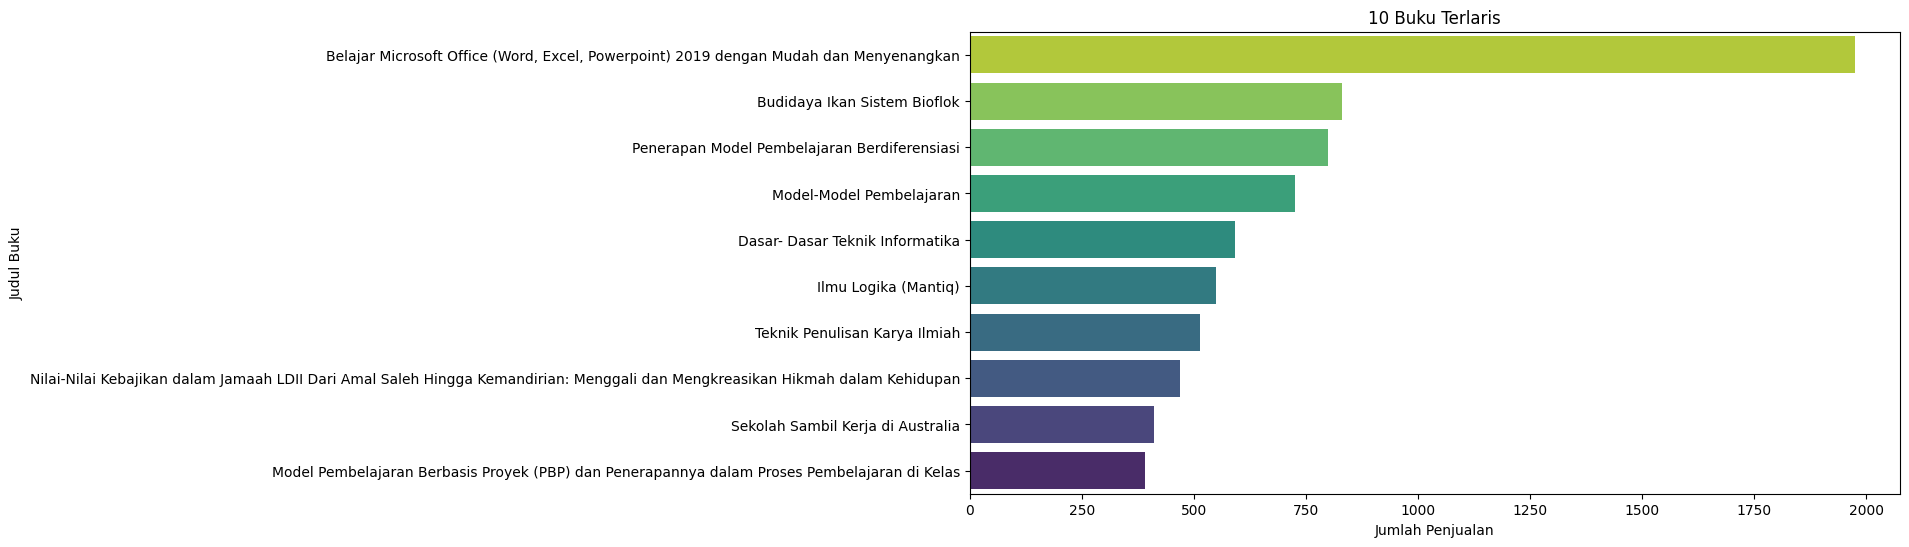

In [51]:
import seaborn as sns

# Hitung total penjualan (jumlah eksemplar) untuk setiap buku
best_selling_books = dfnew.groupby('judul')['order'].sum()

# Ambil 10 buku terlaris
top_10_selling_books = best_selling_books.nlargest(10)

# Plot barchart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_selling_books.values, y=top_10_selling_books.index, palette='viridis_r')
plt.title('10 Buku Terlaris')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Judul Buku')
plt.show()


Analisi Distribusi Penjualan

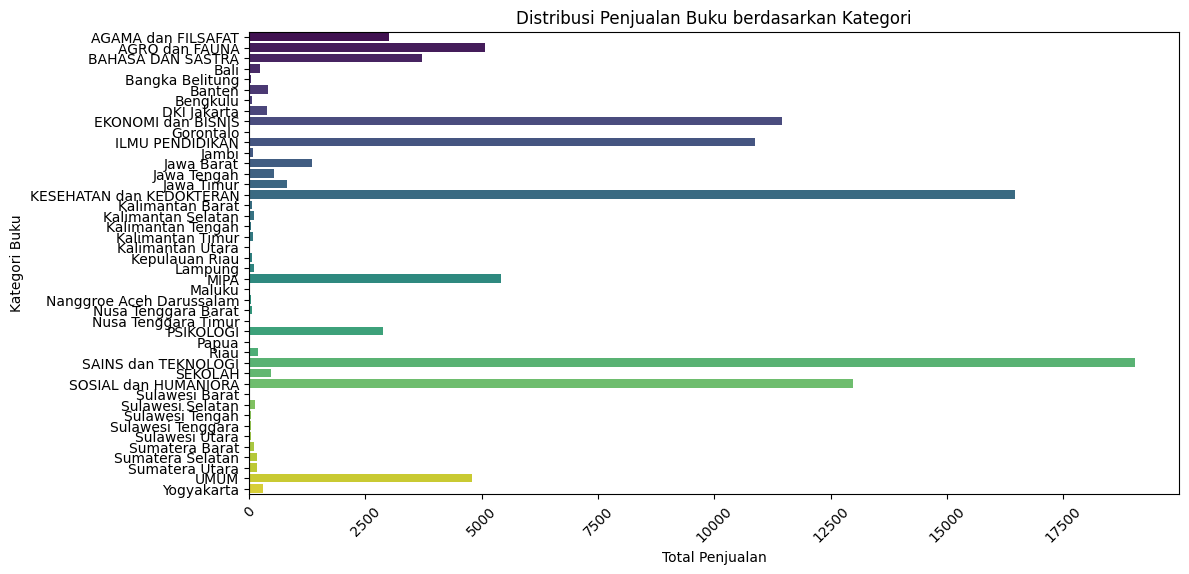

In [52]:
# Analisis distribusi penjualan buku berdasarkan kategori
category_sales = dfnew.groupby('kategori1')['order'].sum()

# Statistik deskriptif
category_statistics = dfnew.groupby('kategori1')['order'].describe()

# Plot distribusi penjualan buku dengan warna 'viridis'
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Distribusi Penjualan Buku berdasarkan Kategori')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Buku')
plt.xticks(rotation=45)

# Tampilkan nilai di atas 2500 (tidak termasuk outlier)
for index, row in category_statistics.iterrows():
    if row['max'] > 2500:
        plt.text(row['max'], index, f"Max: {int(row['max'])}", va='center')

plt.show()


dari hasil plt distribusi di atas didapat ternyata ada kolom province yang masuk ke kolom kategori1, jadi saya coba cek unique dari si province

In [53]:
unique_province_values = dfnew['provinsi'].unique()
print(unique_province_values)

['Sumatera Utara' 'Papua' 'Sumatera Barat' 'Sumatera Selatan'
 'DKI Jakarta' nan 'Lampung' 'Kepulauan Riau' 'Jawa Tengah' 'Jambi'
 'Jawa Timur' 'Kalimantan Selatan' 'Kalimantan Barat'
 'Nusa Tenggara Timur' 'Jawa Barat' 'Yogyakarta' 'Sulawesi Selatan'
 'Bangka Belitung' 'Bali ' 'Bengkulu' 'Banten' 'Sulawesi Tenggara'
 'Kalimantan Timur' 'Kalimantan Tengah' 'Nusa Tenggara Barat' 'Bali'
 'Kalimantan Utara' 'Riau' 'Nanggroe Aceh Darussalam' 'Sulawesi Barat'
 'Sulawesi Utara' 'Gorontalo' 'Sulawesi Tengah' 'Maluku']


In [54]:
# Filter data yang berada di kolom 'kategori1' tetapi seharusnya adalah provinsi
province_values = ['Sumatera Utara', 'Papua', 'Sumatera Barat', 'Sumatera Selatan', 'DKI Jakarta', 'Lampung',
                   'Kepulauan Riau', 'Jawa Tengah', 'Jambi', 'Jawa Timur', 'Kalimantan Selatan',
                   'Kalimantan Barat', 'Nusa Tenggara Timur', 'Jawa Barat', 'Yogyakarta', 'Sulawesi Selatan',
                   'Bangka Belitung', 'Bali ', 'Bengkulu', 'Banten', 'Sulawesi Tenggara', 'Kalimantan Timur',
                   'Kalimantan Tengah', 'Nusa Tenggara Barat', 'Bali', 'Kalimantan Utara', 'Riau',
                   'Nanggroe Aceh Darussalam', 'Sulawesi Barat', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Maluku']

def clean_and_move(row):
    if row['kategori1'] in province_values:
        row['provinsi'] = row['kategori1']
        row['kategori1'] = ''
    return row

# Gunakan apply untuk membersihkan dan memindahkan nilai
dfnew = dfnew.apply(clean_and_move, axis=1)



In [55]:
 dfnew['kategori1'].unique()

array(['SAINS dan TEKNOLOGI', 'MIPA', 'SOSIAL dan HUMANIORA',
       'EKONOMI dan BISNIS', 'ILMU PENDIDIKAN', 'UMUM', 'AGRO dan FAUNA',
       'KESEHATAN dan KEDOKTERAN', 'BAHASA DAN SASTRA',
       'AGAMA dan FILSAFAT', nan, 'PSIKOLOGI', 'SEKOLAH', ''],
      dtype=object)

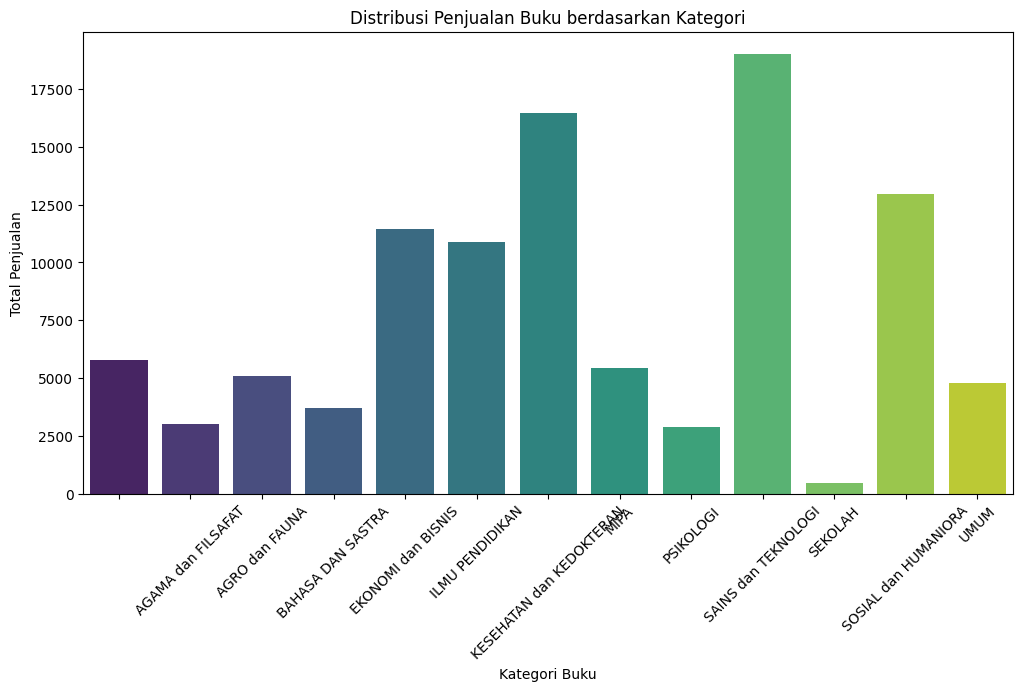

In [56]:
# Analisis distribusi penjualan buku berdasarkan kategori
category_sales = dfnew.groupby('kategori1')['order'].sum()

# Statistik deskriptif
category_statistics = dfnew.groupby('kategori1')['order'].describe()

# Plot distribusi penjualan buku dengan warna 'viridis'
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Distribusi Penjualan Buku berdasarkan Kategori')
plt.xlabel('Kategori Buku')
plt.ylabel('Total Penjualan')

# Tampilkan nilai di atas 2500 (tidak termasuk outlier)
for index, row in category_statistics.iterrows():
    if row['max'] > 2500:
        plt.text(index, row['max'], f"Max: {int(row['max'])}", ha='center')

plt.xticks(rotation=45)
plt.show()


Mmebuat visualisasi lebih jelas dan informatif

In [57]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87153 entries, 0 to 22067
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   deadline   87153 non-null  datetime64[ns]
 1   pic        82307 non-null  object        
 2   reseller   82135 non-null  object        
 3   judul      87116 non-null  object        
 4   order      87011 non-null  float64       
 5   provinsi   56665 non-null  object        
 6   kategori1  78440 non-null  object        
 7   kategori2  78842 non-null  object        
 8   tahun      84407 non-null  object        
 9   penulis    84653 non-null  object        
 10  isbn       84608 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 8.0+ MB


In [58]:
dfnew['kategori1'] = dfnew['kategori1'].astype('category')

In [59]:
dfnew['kategori1_code'] = dfnew['kategori1'].cat.codes

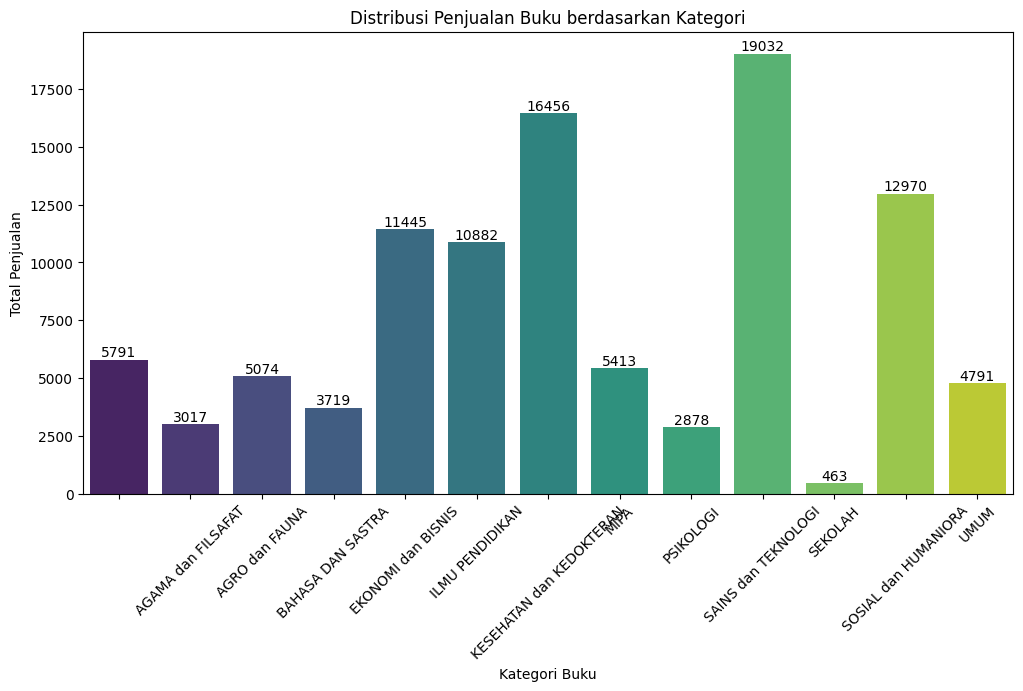

In [60]:
# Analisis distribusi penjualan buku berdasarkan kategori
category_sales = dfnew.groupby('kategori1')['order'].sum()

# Statistik deskriptif
category_statistics = dfnew.groupby('kategori1')['order'].describe()

# Plot distribusi penjualan buku dengan warna 'viridis'
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Distribusi Penjualan Buku berdasarkan Kategori')
plt.xlabel('Kategori Buku')
plt.ylabel('Total Penjualan')

# Tampilkan nilai di atas 2500 (tidak termasuk outlier)
for index, row in category_statistics.iterrows():
    if row['max'] > 2500:
        plt.text(index, row['max'], f"Max: {int(row['max'])}", ha='center')

# Tampilkan nilai jumlah penjualan di atas setiap barchart
for index, value in enumerate(category_sales.values):
    plt.text(index, value, f"{int(value)}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


##Distribusi Numerical Columns

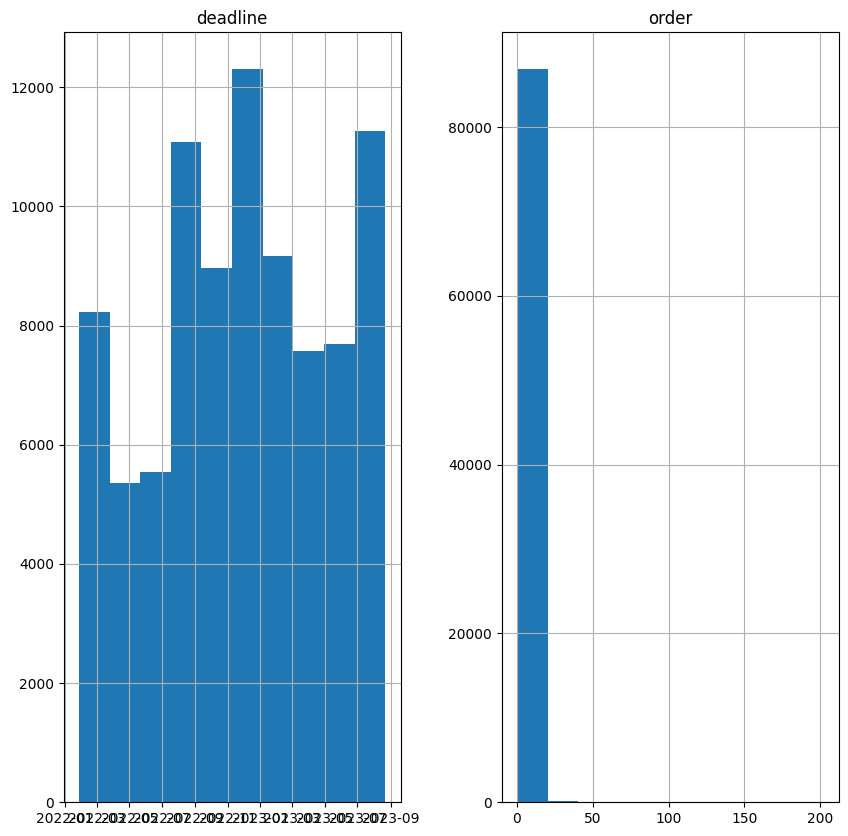

In [61]:
# Check the distribution of the numerical columns
df.hist(figsize=(10, 10))
plt.show()

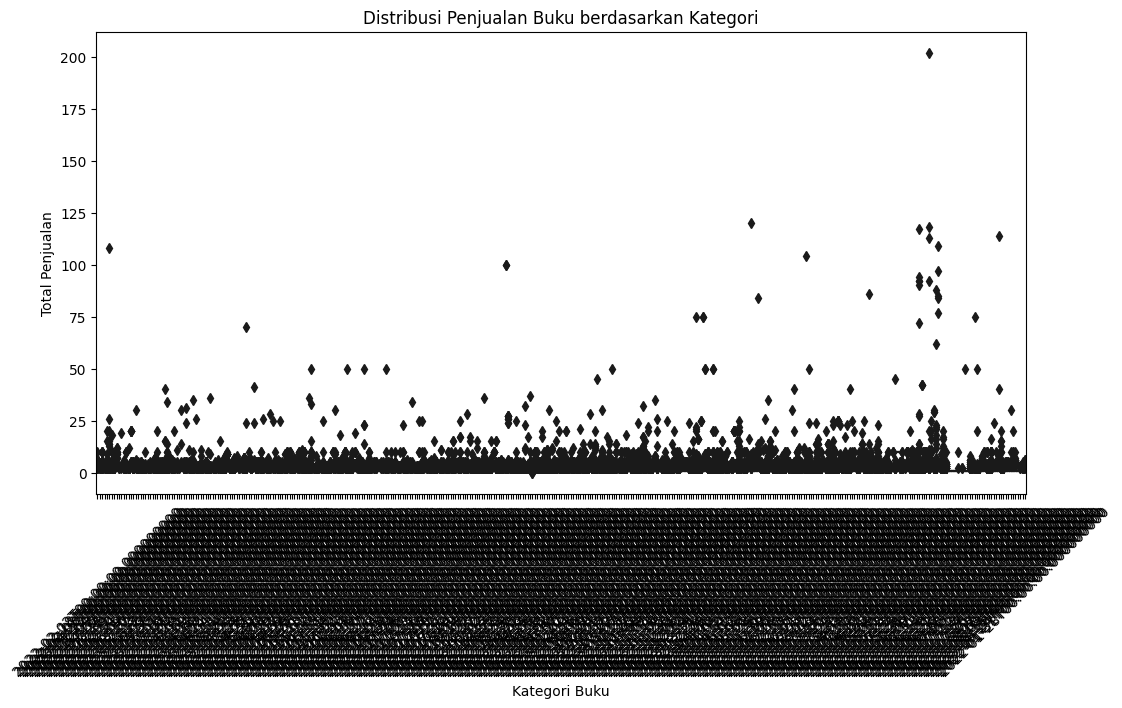

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfnew, x='deadline', y='order', palette='viridis')
plt.title('Distribusi Penjualan Buku berdasarkan Kategori')
plt.xlabel('Kategori Buku')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()


<ipython-input-63-7ec7a8b9c4ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(dfnew.corr())


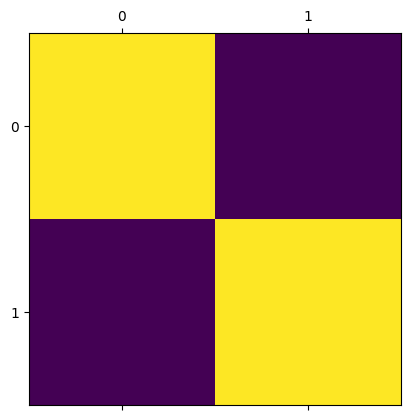

In [63]:
# Check the correlation between the numerical columns
plt.matshow(dfnew.corr())
plt.show()

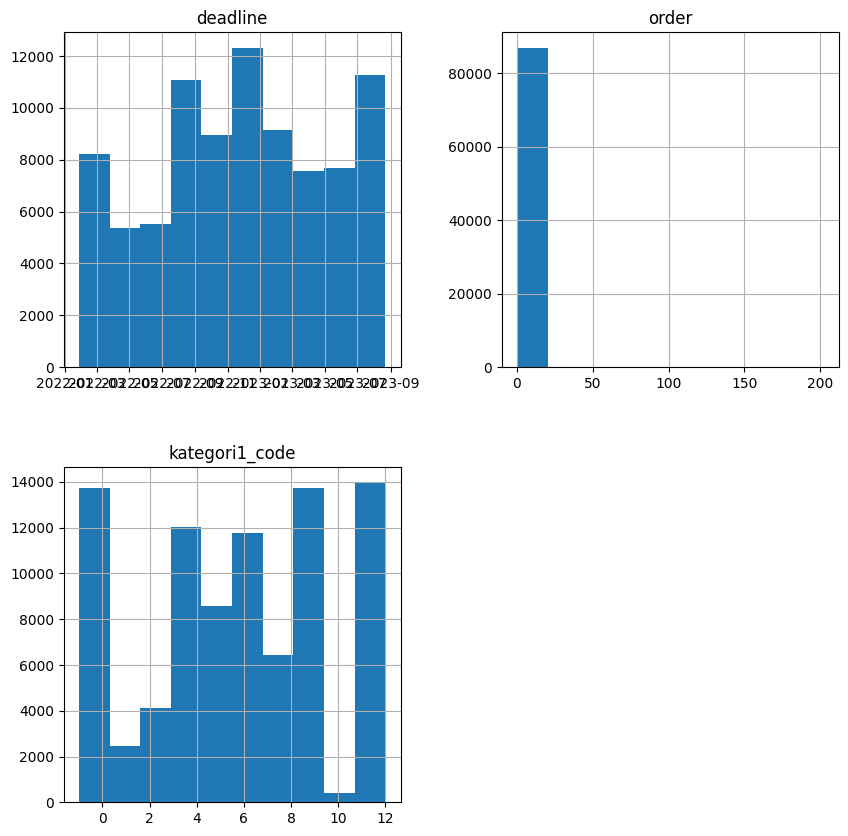

In [64]:
dfnew.hist(figsize=(10, 10))
plt.show()

##Visualisasi distribusi dari kolom "order" (total penjualan buku):

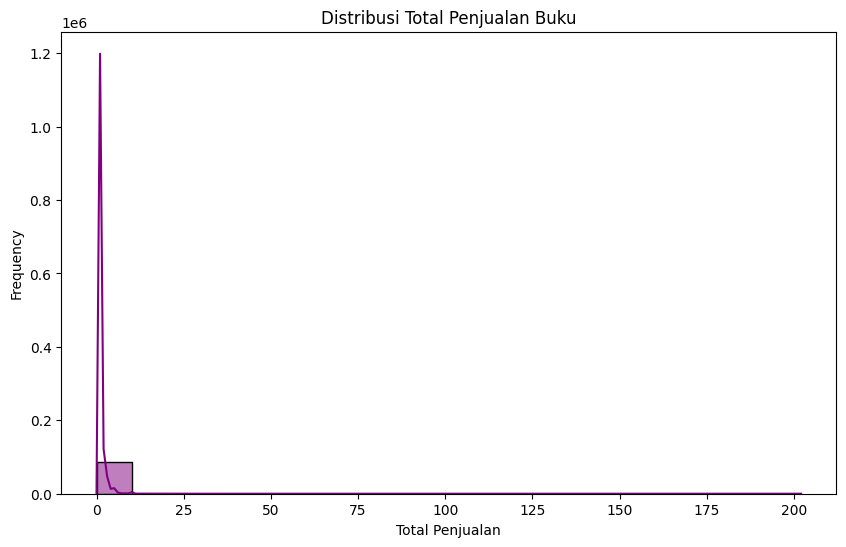

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(dfnew['order'], bins=20, kde=True, color='purple')
plt.title('Distribusi Total Penjualan Buku')
plt.xlabel('Total Penjualan')
plt.ylabel('Frequency')
plt.show()

##Visualisasi distribusi dari kolom "tahun" (tahun penerbitan):

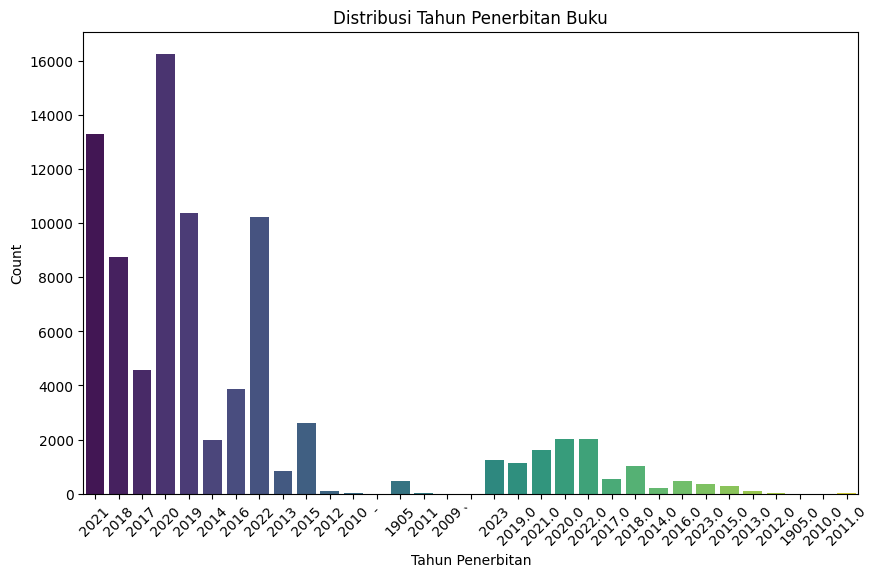

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfnew, x='tahun', palette='viridis')
plt.title('Distribusi Tahun Penerbitan Buku')
plt.xlabel('Tahun Penerbitan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##Check Unique deadline

In [67]:
unique_deadlines = dfnew['deadline'].unique()
print(unique_deadlines)

['2022-02-02T00:00:00.000000000' '2022-02-18T00:00:00.000000000'
 '2022-02-03T00:00:00.000000000' '2022-02-08T00:00:00.000000000'
 '2022-04-20T00:00:00.000000000' '2023-04-13T00:00:00.000000000'
 '2022-02-22T00:00:00.000000000' '2022-02-04T00:00:00.000000000'
 '2022-12-09T00:00:00.000000000' '2022-02-23T00:00:00.000000000'
 '2022-04-26T00:00:00.000000000' '2022-02-07T00:00:00.000000000'
 '2022-02-24T00:00:00.000000000' '2022-03-15T00:00:00.000000000'
 '2022-12-30T00:00:00.000000000' '2022-02-09T00:00:00.000000000'
 '2022-02-11T00:00:00.000000000' '2022-02-10T00:00:00.000000000'
 '2022-02-14T00:00:00.000000000' '2022-02-21T00:00:00.000000000'
 '2022-02-15T00:00:00.000000000' '2022-05-09T00:00:00.000000000'
 '2022-02-16T00:00:00.000000000' '2022-03-10T00:00:00.000000000'
 '2022-02-17T00:00:00.000000000' '2023-02-22T00:00:00.000000000'
 '2023-02-23T00:00:00.000000000' '2023-03-13T00:00:00.000000000'
 '2023-03-17T00:00:00.000000000' '2023-03-28T00:00:00.000000000'
 '2022-06-03T00:00:00.000

##Visualisasi distribusi dari kolom "penulis" (penulis buku terkait penjualan)

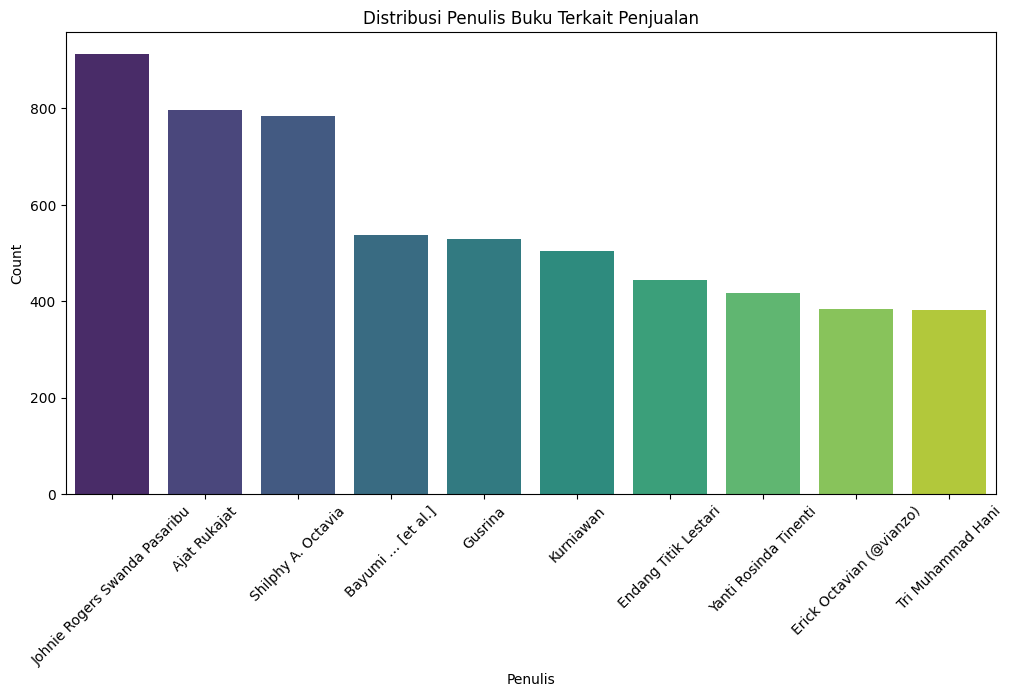

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dfnew, x='penulis', palette='viridis', order=dfnew['penulis'].value_counts().index[:10])
plt.title('Distribusi Penulis Buku Terkait Penjualan')
plt.xlabel('Penulis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##Visualisasi distribusi dari kolom "kategori1" (kategori buku)

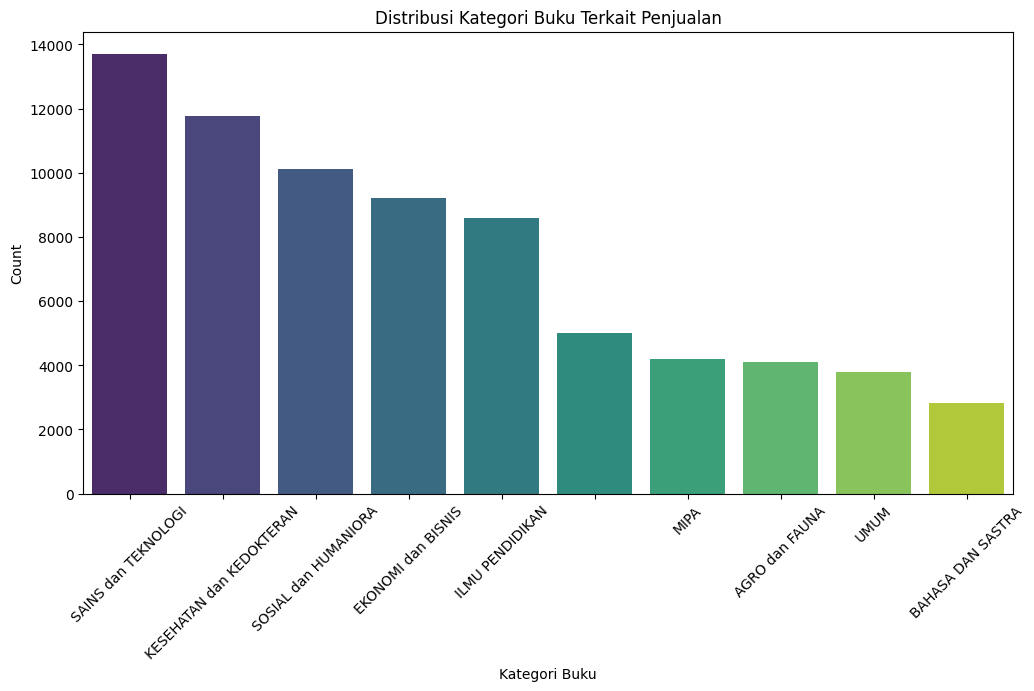

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dfnew, x='kategori1', palette='viridis', order=dfnew['kategori1'].value_counts().index[:10])
plt.title('Distribusi Kategori Buku Terkait Penjualan')
plt.xlabel('Kategori Buku')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [70]:
dfnew['kategori1'].isnull().sum()

8713

In [71]:
dfnew.isnull().mean().round(3).mul(100)

deadline           0.0
pic                5.6
reseller           5.8
judul              0.0
order              0.2
provinsi          35.0
kategori1         10.0
kategori2          9.5
tahun              3.2
penulis            2.9
isbn               2.9
kategori1_code     0.0
dtype: float64

In [72]:
null_distribution = dfnew.isnull().sum()


##Cek Distribusi All Columns

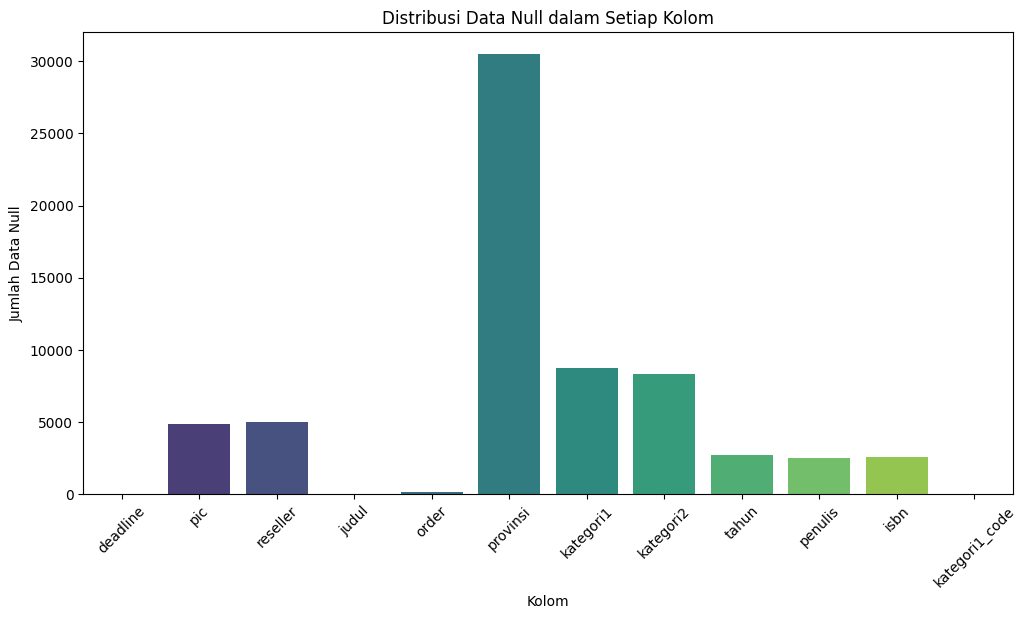

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x=null_distribution.index, y=null_distribution.values, palette='viridis')
plt.title('Distribusi Data Null dalam Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Data Null')
plt.xticks(rotation=45)
plt.show()

walaupun data province diatas terdapat null terbesar, tidaklah bijak jika kita asal mengisi null itu dengan modus atau nilai yang paling sering muncul dikarenakan data geo merupakan data yang semestisnya menjadi tolak ukur dalam sebuah penilaian sebuah data jadi kita tetap mempertahankan null tersebut,
dan walaupun diperlukan fillna perlu didiskusikan dengan stakeholder berkaitan

##Distribusi Order Berdasarkan Provinsi

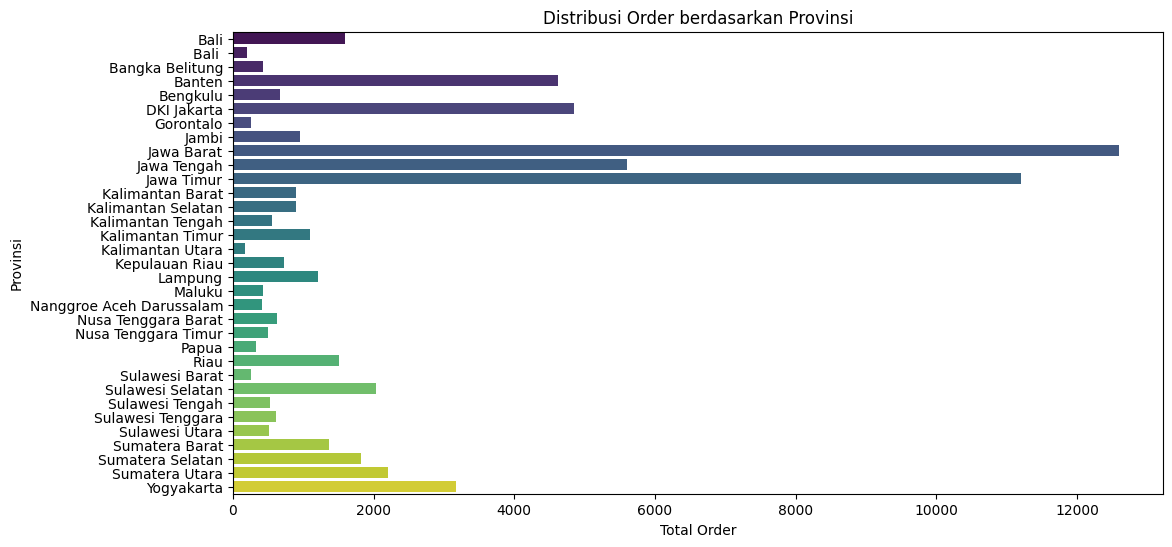

In [74]:
order_by_provinsi = dfnew.groupby('provinsi')['order'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='order', y='provinsi', data=order_by_provinsi, palette='viridis')
plt.title('Distribusi Order berdasarkan Provinsi')
plt.xlabel('Total Order')
plt.ylabel('Provinsi')
plt.show()


Sort Descending

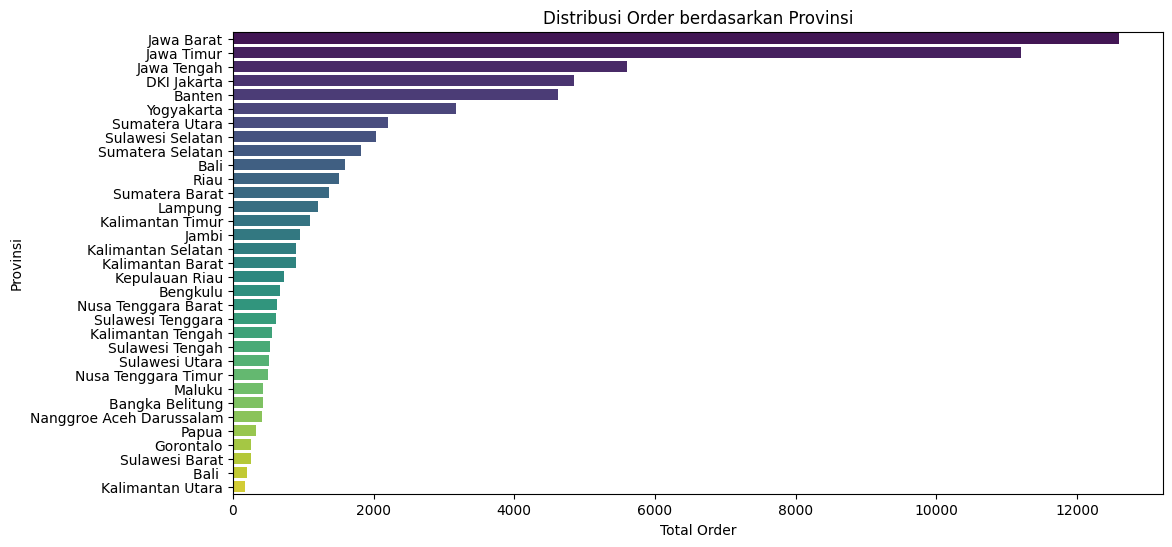

In [75]:
order_by_provinsi = dfnew.groupby('provinsi')['order'].sum().reset_index()
order_by_provinsi = order_by_provinsi.sort_values(by='order', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='order', y='provinsi', data=order_by_provinsi, palette='viridis')
plt.title('Distribusi Order berdasarkan Provinsi')
plt.xlabel('Total Order')
plt.ylabel('Provinsi')
plt.show()


##Cek Penjualan Jawa Barat

In [76]:
# Filter data penjualan di Jawa Barat
jawa_barat_sales = dfnew[dfnew['provinsi'] == 'Jawa Barat']

# Analisis buku paling laku di Jawa Barat
top_selling_books_jawa_barat = jawa_barat_sales.groupby('judul')['order'].sum().reset_index()
top_selling_books_jawa_barat = top_selling_books_jawa_barat.sort_values(by='order', ascending=False)


##Buku paling laku di Jawa Barat

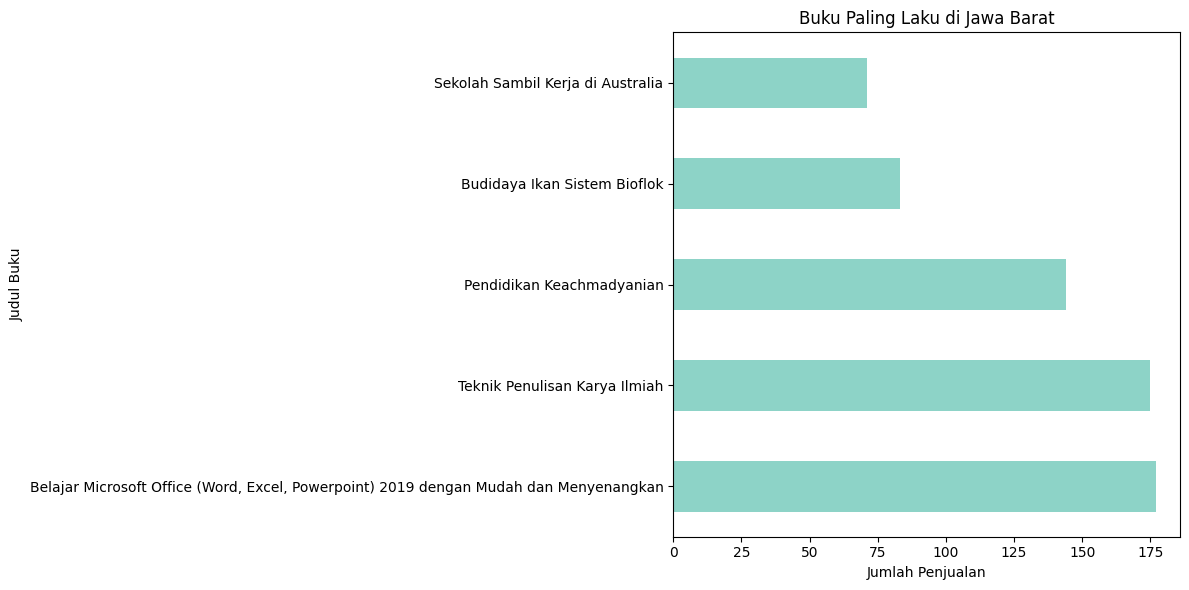

In [77]:
# Analisis buku paling laku di Jawa Barat
top_books_jawa_barat = jawa_barat_sales['judul'].value_counts().head(5)

# Buat bar chart
plt.figure(figsize=(12, 6))
ax = top_books_jawa_barat.plot(kind='barh', colormap='Set3')
ax.set_yticklabels(top_books_jawa_barat.index, rotation=0)
plt.title('Buku Paling Laku di Jawa Barat')
plt.ylabel('Judul Buku')
plt.xlabel('Jumlah Penjualan')
plt.tight_layout()

plt.show()


## Buku Paling Laku di Kalimantan Utara

In [78]:
kalimantan_utara_sales = dfnew[dfnew['provinsi'] == 'Kalimantan Utara']
top_selling_books_kalimantan_utara = kalimantan_utara_sales.groupby('judul')['order'].sum().reset_index()
top_selling_books_kalimantan_utara = top_selling_books_kalimantan_utara.sort_values(by='order', ascending=False)


<ipython-input-79-2d630d400146>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


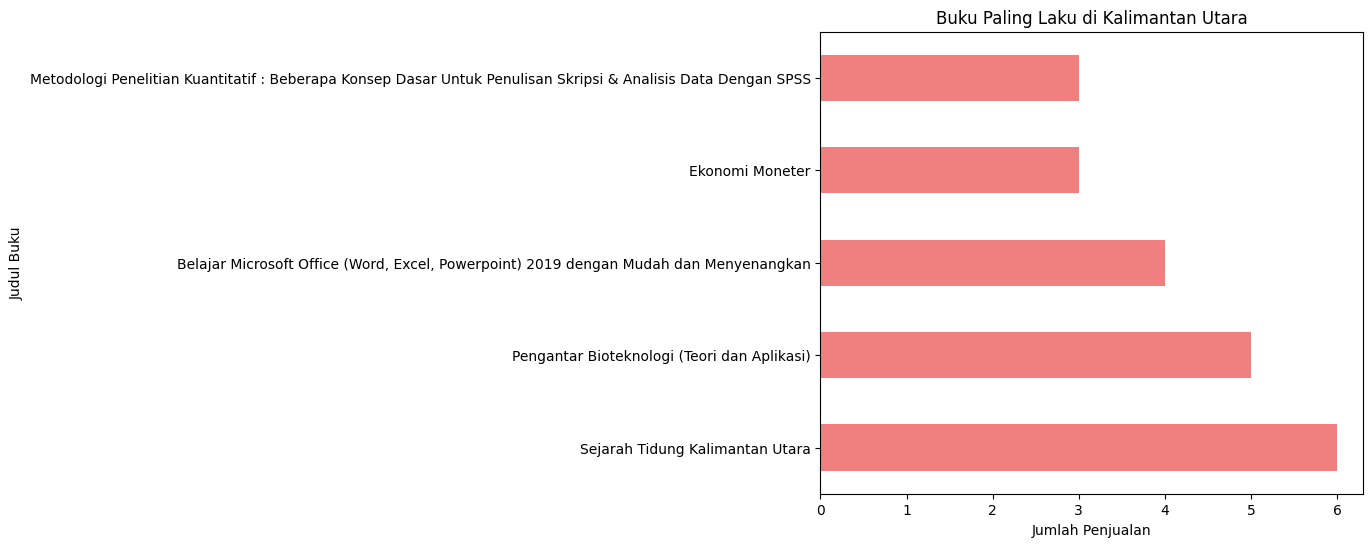

In [79]:

# Analisis buku paling laku di Kalimantan Utara
top_books_kalimantan_utara = kalimantan_utara_sales['judul'].value_counts().head(5)

# Buat bar chart
plt.figure(figsize=(7, 6))
ax = top_books_kalimantan_utara.plot(kind='barh', color='lightcoral')
ax.set_yticklabels(top_books_kalimantan_utara.index, rotation=0)
plt.title('Buku Paling Laku di Kalimantan Utara')
plt.ylabel('Judul Buku')
plt.xlabel('Jumlah Penjualan')
plt.tight_layout()

plt.show()


In [80]:
dfnew.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order          provinsi  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0    Sumatera Utara   
1                                 Lingkungan Tambang    1.0             Papua   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0    Sumatera Barat   
3                                  Hukum Waris Islam    1.0  Sumatera Selatan   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0       DKI Jakarta   

              kategori1             kategori2 tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi  2021   
1   SAINS dan TEKNOLOGI          Pertambangan  2021   
2                  MIPA               BIOLOGI  2018   
3  SOSIAL dan HUMANIORA           Hukum Islam  2021   
4    EKONOMI dan BISNIS             Manajemen  2017   

                                  penulis               isbn  kategori1_code  
0                               Supriyadi  978-623-02-2629-8               9  
1                   Joni Safaat Adiansyah  978-623-02-3254-1               9  
2                           Linda Advinda  978-602-453-625-1               7  
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7              11  
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1               4

In [81]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87153 entries, 0 to 22067
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   deadline        87153 non-null  datetime64[ns]
 1   pic             82307 non-null  object        
 2   reseller        82135 non-null  object        
 3   judul           87116 non-null  object        
 4   order           87011 non-null  float64       
 5   provinsi        56665 non-null  object        
 6   kategori1       78440 non-null  category      
 7   kategori2       78842 non-null  object        
 8   tahun           84407 non-null  object        
 9   penulis         84653 non-null  object        
 10  isbn            84608 non-null  object        
 11  kategori1_code  87153 non-null  int8          
dtypes: category(1), datetime64[ns](1), float64(1), int8(1), object(8)
memory usage: 7.5+ MB


##Visualisasi distribusi dari kolom "Deadline"

In [82]:
dfnew.isnull().mean().round(3).mul(100)

deadline           0.0
pic                5.6
reseller           5.8
judul              0.0
order              0.2
provinsi          35.0
kategori1         10.0
kategori2          9.5
tahun              3.2
penulis            2.9
isbn               2.9
kategori1_code     0.0
dtype: float64

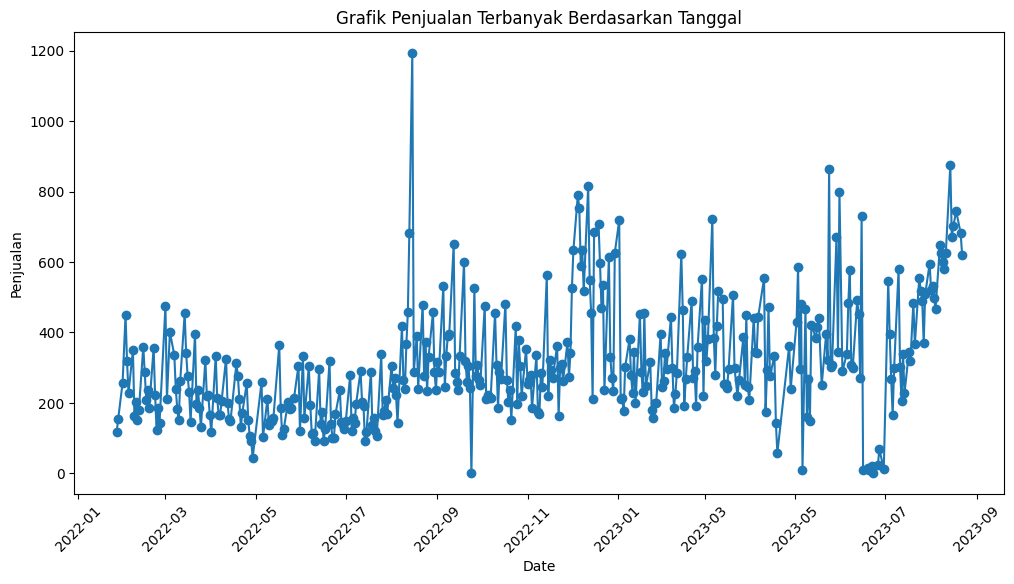

In [83]:
daily_sales = dfnew.groupby('deadline')['order'].sum()

# Buat visualisasi grafik garis
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')

# Atur label sumbu x dan y
plt.xlabel('Date')
plt.ylabel('Penjualan')

# Atur judul grafik
plt.title('Grafik Penjualan Terbanyak Berdasarkan Tanggal')

# Format sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()



In [84]:
dfnew['order'].isnull().sum()

142

In [85]:
dfnew.isnull().mean().round(3).mul(100)

deadline           0.0
pic                5.6
reseller           5.8
judul              0.0
order              0.2
provinsi          35.0
kategori1         10.0
kategori2          9.5
tahun              3.2
penulis            2.9
isbn               2.9
kategori1_code     0.0
dtype: float64

In [86]:
dfnew.dropna()

deadline     pic         reseller  \
0     2022-02-02    RS 1  bukukuliahjogja   
1     2022-02-02    RS 1        jogjabook   
2     2022-02-02    RS 1        jogjabook   
3     2022-02-02    RS 1        jogjabook   
4     2022-02-02    RS 1            fahmi   
...          ...     ...              ...   
22062 2022-02-02    RS 1          omviral   
22063 2022-02-02    RS 1          omviral   
22064 2022-02-02    RS 1    buku palasari   
22065 2022-02-02    RS 1          omviral   
22066 2022-02-02  Retail    Deepublish WA   

                                                   judul  order  \
0      Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
1                                     Lingkungan Tambang    1.0   
2                       Dasar – Dasar Fisiologi Tumbuhan    1.0   
3                                      Hukum Waris Islam    1.0   
4      Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   
...                                                  ...    ...   
22062  Pendidikan Kemuhammadiyahan Kelas X Semester 1...    1.0   
22063       Buku Ajar Entomologi dan Pengendalian Vektor    1.0   
22064                               Kumpulan Cerita Anak    1.0   
22065                           Modul Praktikum Robotika    1.0   
22066  Analisis Rasionalitas Antibiotik di Fasilitas ...    1.0   

                 provinsi                 kategori1             kategori2  \
0          Sumatera Utara       SAINS dan TEKNOLOGI  Komputer & Teknologi   
1                   Papua       SAINS dan TEKNOLOGI          Pertambangan   
2          Sumatera Barat                      MIPA               BIOLOGI   
3        Sumatera Selatan      SOSIAL dan HUMANIORA           Hukum Islam   
4             DKI Jakarta        EKONOMI dan BISNIS             Manajemen   
...                   ...                       ...                   ...   
22062             Lampung                   SEKOLAH                 SMA/K   
22063          Jawa Barat  KESEHATAN dan KEDOKTERAN  Kesehatan Masyarakat   
22064          Jawa Barat                      UMUM                Cerpen   
22065          Jawa Barat       SAINS dan TEKNOLOGI        Teknik Elektro   
22066  Kalimantan Selatan  KESEHATAN dan KEDOKTERAN       Kedokteran umum   

        tahun                                            penulis  \
0        2021                                          Supriyadi   
1        2021                              Joni Safaat Adiansyah   
2        2018                                      Linda Advinda   
3        2021             Iman Jauhari dan T. Muhammad Ali Bahar   
4        2017                      Martino Wibowo, Ahmad Subagyo   
...       ...                                                ...   
22062  2021.0                                             Legino   
22063  2017.0  Denai Wahyuni, Makomulamin, dan Nila Puspita Sari   
22064  2021.0                                S.S. Dewi Anggraeni   
22065  2018.0             Eko Aris Budi Cahyono dan Agus Siswoyo   
22066  2021.0                                     Sunandar Ihsan   

                    isbn  kategori1_code  
0      978-623-02-2629-8               9  
1      978-623-02-3254-1               9  
2      978-602-453-625-1               7  
3      978-623-02-3306-7              11  
4      978-602-401-752-1               4  
...                  ...             ...  
22062  978-623-02-3202-2              10  
22063  978-602-453-541-4               6  
22064  978-623-02-2685-4              12  
22065  978-602-475-936-0               9  
22066  978-623-02-3706-5               6  

[52792 rows x 12 columns]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87156 entries, 0 to 22067
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   deadline   87156 non-null  datetime64[ns]
 1   pic        82308 non-null  object        
 2   reseller   82136 non-null  object        
 3   judul      87119 non-null  object        
 4   order      87013 non-null  float64       
 5   provinsi   51663 non-null  object        
 6   kategori1  78441 non-null  object        
 7   kategori2  78844 non-null  object        
 8   kategori3  11179 non-null  object        
 9   tahun      84409 non-null  object        
 10  penulis    84655 non-null  object        
 11  isbn       84609 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 10.7+ MB


#Transformasi Data

In [88]:
dfnew['deadline'] = pd.to_datetime(dfnew['deadline'])

In [89]:
dfnew['tahun'] = dfnew['deadline'].dt.year
dfnew['bulan'] = dfnew['deadline'].dt.month

In [90]:
monthly_sales = dfnew.groupby(['tahun', 'bulan'])['order'].sum().reset_index()


In [91]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87153 entries, 0 to 22067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   deadline        87153 non-null  datetime64[ns]
 1   pic             82307 non-null  object        
 2   reseller        82135 non-null  object        
 3   judul           87116 non-null  object        
 4   order           87011 non-null  float64       
 5   provinsi        56665 non-null  object        
 6   kategori1       78440 non-null  category      
 7   kategori2       78842 non-null  object        
 8   tahun           87153 non-null  int64         
 9   penulis         84653 non-null  object        
 10  isbn            84608 non-null  object        
 11  kategori1_code  87153 non-null  int8          
 12  bulan           87153 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), int8(1), object(7)
memory usage: 8.1+ MB


In [92]:
dfnew.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order          provinsi  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0    Sumatera Utara   
1                                 Lingkungan Tambang    1.0             Papua   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0    Sumatera Barat   
3                                  Hukum Waris Islam    1.0  Sumatera Selatan   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0       DKI Jakarta   

              kategori1             kategori2  tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi   2022   
1   SAINS dan TEKNOLOGI          Pertambangan   2022   
2                  MIPA               BIOLOGI   2022   
3  SOSIAL dan HUMANIORA           Hukum Islam   2022   
4    EKONOMI dan BISNIS             Manajemen   2022   

                                  penulis               isbn  kategori1_code  \
0                               Supriyadi  978-623-02-2629-8               9   
1                   Joni Safaat Adiansyah  978-623-02-3254-1               9   
2                           Linda Advinda  978-602-453-625-1               7   
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7              11   
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1               4   

   bulan  
0      2  
1      2  
2      2  
3      2  
4      2

In [93]:
dfnew.deadline.min(), dfnew.deadline.max()

(Timestamp('2022-01-27 00:00:00'), Timestamp('2023-08-22 00:00:00'))

In [94]:
dfnew['MonthYear'] = pd.to_datetime(dfnew['deadline'], format='%Y-%m')

In [95]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87153 entries, 0 to 22067
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   deadline        87153 non-null  datetime64[ns]
 1   pic             82307 non-null  object        
 2   reseller        82135 non-null  object        
 3   judul           87116 non-null  object        
 4   order           87011 non-null  float64       
 5   provinsi        56665 non-null  object        
 6   kategori1       78440 non-null  category      
 7   kategori2       78842 non-null  object        
 8   tahun           87153 non-null  int64         
 9   penulis         84653 non-null  object        
 10  isbn            84608 non-null  object        
 11  kategori1_code  87153 non-null  int8          
 12  bulan           87153 non-null  int64         
 13  MonthYear       87153 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(1), int64(2

In [96]:
dfnew.MonthYear.min(), dfnew.MonthYear.max()

(Timestamp('2022-01-27 00:00:00'), Timestamp('2023-08-22 00:00:00'))

In [97]:
# checking if data is continues
if (dfnew.MonthYear.max() - dfnew.MonthYear.min() == 214):
    print('Data Is Continuous')

In [98]:
# Filter data untuk tahun 2023 berdasarkan kolom 'deadline'
df_2023 = dfnew[dfnew['deadline'].dt.year == 2023]


In [99]:
#dfnew = dfnew.drop(columns=['MonthYear'])

In [100]:
dfnew.head()

deadline   pic         reseller  \
0 2022-02-02  RS 1  bukukuliahjogja   
1 2022-02-02  RS 1        jogjabook   
2 2022-02-02  RS 1        jogjabook   
3 2022-02-02  RS 1        jogjabook   
4 2022-02-02  RS 1            fahmi   

                                               judul  order          provinsi  \
0  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0    Sumatera Utara   
1                                 Lingkungan Tambang    1.0             Papua   
2                   Dasar – Dasar Fisiologi Tumbuhan    1.0    Sumatera Barat   
3                                  Hukum Waris Islam    1.0  Sumatera Selatan   
4  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0       DKI Jakarta   

              kategori1             kategori2  tahun  \
0   SAINS dan TEKNOLOGI  Komputer & Teknologi   2022   
1   SAINS dan TEKNOLOGI          Pertambangan   2022   
2                  MIPA               BIOLOGI   2022   
3  SOSIAL dan HUMANIORA           Hukum Islam   2022   
4    EKONOMI dan BISNIS             Manajemen   2022   

                                  penulis               isbn  kategori1_code  \
0                               Supriyadi  978-623-02-2629-8               9   
1                   Joni Safaat Adiansyah  978-623-02-3254-1               9   
2                           Linda Advinda  978-602-453-625-1               7   
3  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7              11   
4           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1               4   

   bulan  MonthYear  
0      2 2022-02-02  
1      2 2022-02-02  
2      2 2022-02-02  
3      2 2022-02-02  
4      2 2022-02-02

Cek Distribusi MonthYear terhadap Order

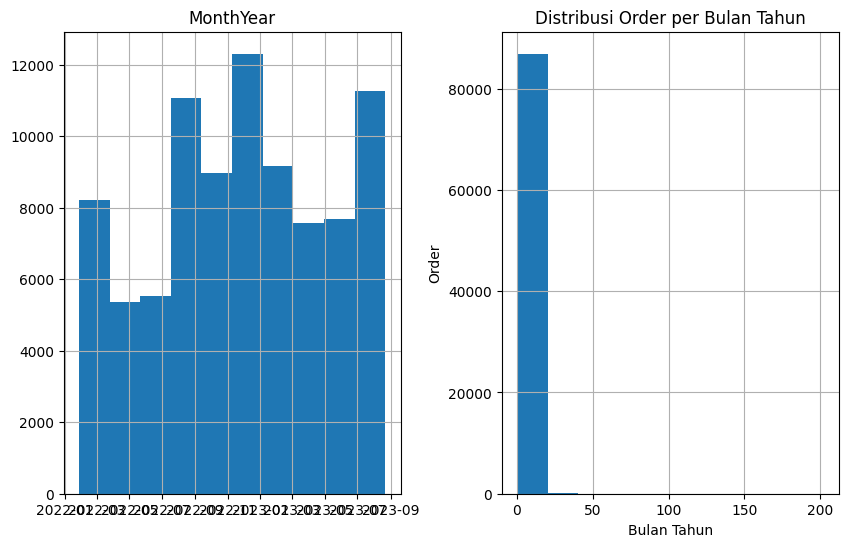

In [101]:
dfnew.reset_index()[['MonthYear', 'order']].hist(figsize=(10, 6))
plt.title('Distribusi Order per Bulan Tahun')
plt.xlabel('Bulan Tahun')
plt.ylabel('Order')
plt.show()


#Analisa Time Series

In [102]:
dfnew.set_index(['MonthYear'], inplace=True)

In [103]:
# checking if data is continues
if (df.index.max() - df.index.min() == 214):
    print('Data Is Continuous')

In [104]:
df.index.freq = 'MS'  # Setting the data frequency to month start

In [105]:
dfnew.head()

deadline   pic         reseller  \
MonthYear                                      
2022-02-02 2022-02-02  RS 1  bukukuliahjogja   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1            fahmi   

                                                        judul  order  \
MonthYear                                                              
2022-02-02  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
2022-02-02                                 Lingkungan Tambang    1.0   
2022-02-02                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
2022-02-02                                  Hukum Waris Islam    1.0   
2022-02-02  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   

                    provinsi             kategori1             kategori2  \
MonthYear                                                                  
2022-02-02    Sumatera Utara   SAINS dan TEKNOLOGI  Komputer & Teknologi   
2022-02-02             Papua   SAINS dan TEKNOLOGI          Pertambangan   
2022-02-02    Sumatera Barat                  MIPA               BIOLOGI   
2022-02-02  Sumatera Selatan  SOSIAL dan HUMANIORA           Hukum Islam   
2022-02-02       DKI Jakarta    EKONOMI dan BISNIS             Manajemen   

            tahun                                 penulis               isbn  \
MonthYear                                                                      
2022-02-02   2022                               Supriyadi  978-623-02-2629-8   
2022-02-02   2022                   Joni Safaat Adiansyah  978-623-02-3254-1   
2022-02-02   2022                           Linda Advinda  978-602-453-625-1   
2022-02-02   2022  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7   
2022-02-02   2022           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1   

            kategori1_code  bulan  
MonthYear                          
2022-02-02               9      2  
2022-02-02               9      2  
2022-02-02               7      2  
2022-02-02              11      2  
2022-02-02               4      2

In [106]:
dfnew.index.min(), dfnew.index.max()

(Timestamp('2022-01-27 00:00:00'), Timestamp('2023-08-22 00:00:00'))

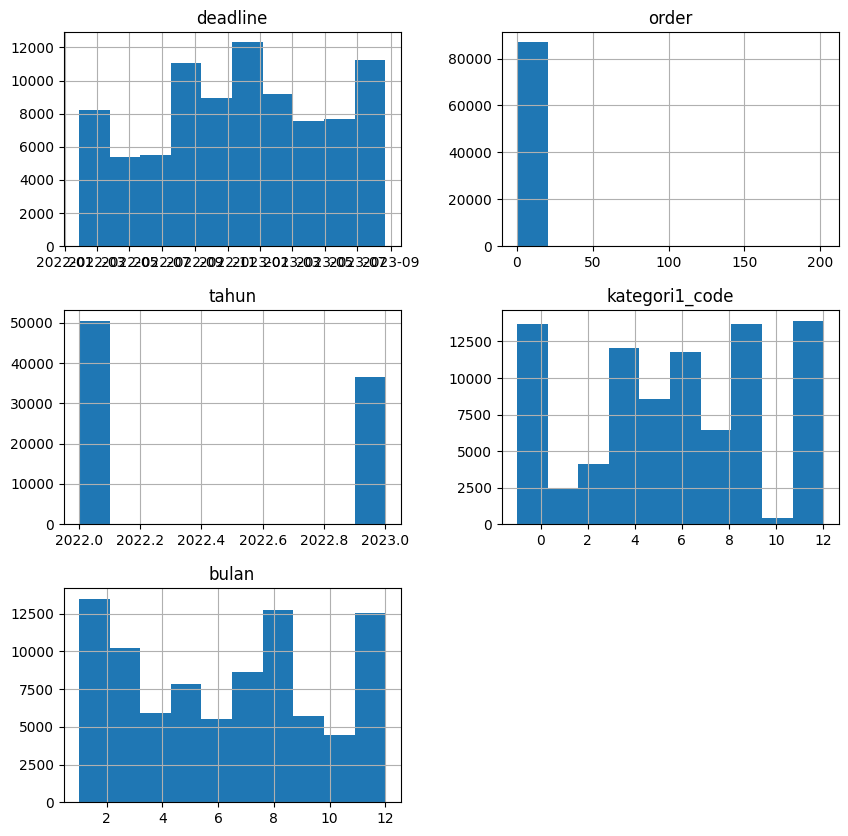

In [107]:
dfnew.hist(figsize=(10, 10))
plt.show()

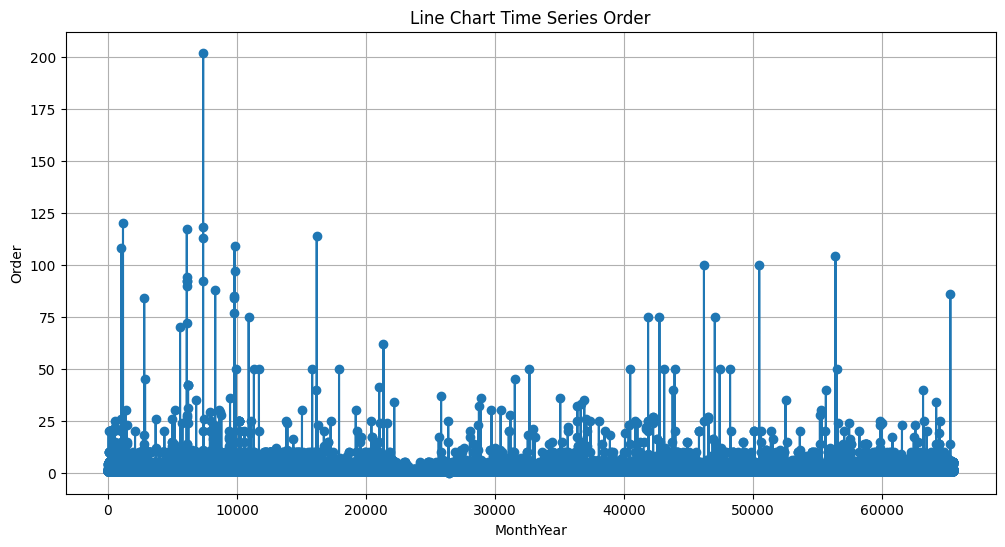

[  1.   2.   5.  10.   3.   7.   4.   6.  30.  nan  18.  26.  70.  24.
  12.  31.  11.  35.   8.  28.   9.  36.  15.  20.  19.  25.  50.  23.
  17.  34.  37.   0.  14.  32.  45.  21.  22.  13.  33.  75.  27.  16.
  40. 100. 104.  86. 108. 120.  84.  72.  92.  94.  90. 117.  42. 113.
 118. 202.  29.  88.  77.  85. 109.  97. 114.  41.  62.]


In [108]:
df_visual = df.sort_index()
plt.figure(figsize=(12, 6))
plt.plot(df_visual.index, df_visual['order'], marker='o', linestyle='-')
plt.title('Line Chart Time Series Order')
plt.xlabel('MonthYear')
plt.ylabel('Order')
plt.grid(True)
plt.show()
unique_values = df['order'].unique()
print(unique_values)


In [109]:
unique_values = df['order'].unique()
print(unique_values)


[  1.   2.   5.  10.   3.   7.   4.   6.  30.  nan  18.  26.  70.  24.
  12.  31.  11.  35.   8.  28.   9.  36.  15.  20.  19.  25.  50.  23.
  17.  34.  37.   0.  14.  32.  45.  21.  22.  13.  33.  75.  27.  16.
  40. 100. 104.  86. 108. 120.  84.  72.  92.  94.  90. 117.  42. 113.
 118. 202.  29.  88.  77.  85. 109.  97. 114.  41.  62.]


In [110]:
df.dropna(subset=['order'], inplace=True)


In [111]:
unique_values = df['order'].unique()
print(unique_values)


[  1.   2.   5.  10.   3.   7.   4.   6.  30.  18.  26.  70.  24.  12.
  31.  11.  35.   8.  28.   9.  36.  15.  20.  19.  25.  50.  23.  17.
  34.  37.   0.  14.  32.  45.  21.  22.  13.  33.  75.  27.  16.  40.
 100. 104.  86. 108. 120.  84.  72.  92.  94.  90. 117.  42. 113. 118.
 202.  29.  88.  77.  85. 109.  97. 114.  41.  62.]


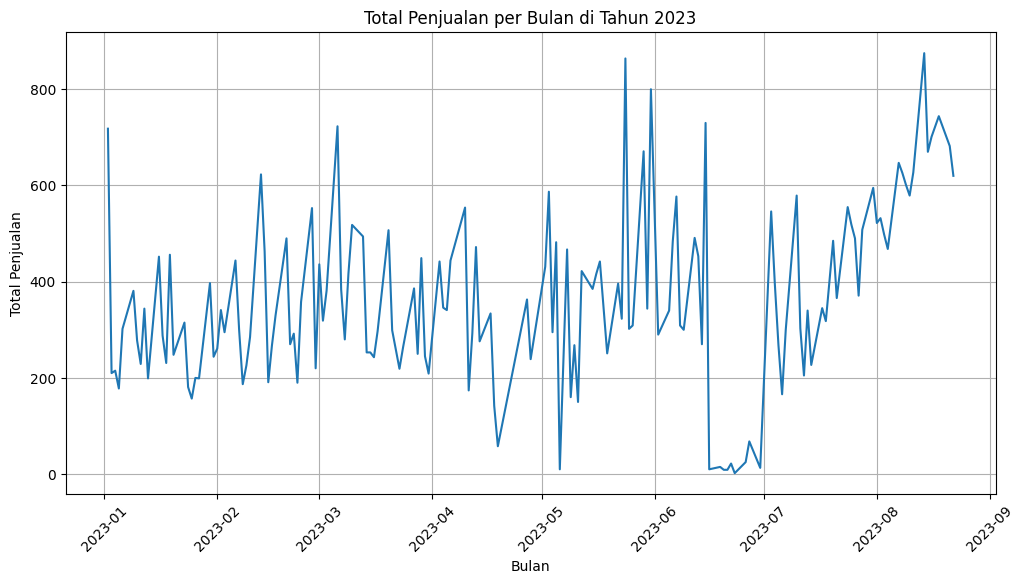

In [112]:
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot

# Filter data untuk tahun 2023
df_2023 = dfnew[dfnew['deadline'].dt.year == 2023]

# Menghitung total penjualan per bulan
monthly_sales = df_2023.groupby('deadline')['order'].sum().reset_index()

# Membuat line chart dengan Seaborn
sns.lineplot(data=monthly_sales, x="deadline", y="order")

plt.title("Total Penjualan per Bulan di Tahun 2023")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.grid(True)

plt.show()


In [113]:
dfnew.head()

deadline   pic         reseller  \
MonthYear                                      
2022-02-02 2022-02-02  RS 1  bukukuliahjogja   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1            fahmi   

                                                        judul  order  \
MonthYear                                                              
2022-02-02  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
2022-02-02                                 Lingkungan Tambang    1.0   
2022-02-02                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
2022-02-02                                  Hukum Waris Islam    1.0   
2022-02-02  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   

                    provinsi             kategori1             kategori2  \
MonthYear                                                                  
2022-02-02    Sumatera Utara   SAINS dan TEKNOLOGI  Komputer & Teknologi   
2022-02-02             Papua   SAINS dan TEKNOLOGI          Pertambangan   
2022-02-02    Sumatera Barat                  MIPA               BIOLOGI   
2022-02-02  Sumatera Selatan  SOSIAL dan HUMANIORA           Hukum Islam   
2022-02-02       DKI Jakarta    EKONOMI dan BISNIS             Manajemen   

            tahun                                 penulis               isbn  \
MonthYear                                                                      
2022-02-02   2022                               Supriyadi  978-623-02-2629-8   
2022-02-02   2022                   Joni Safaat Adiansyah  978-623-02-3254-1   
2022-02-02   2022                           Linda Advinda  978-602-453-625-1   
2022-02-02   2022  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7   
2022-02-02   2022           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1   

            kategori1_code  bulan  
MonthYear                          
2022-02-02               9      2  
2022-02-02               9      2  
2022-02-02               7      2  
2022-02-02              11      2  
2022-02-02               4      2

In [114]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87153 entries, 2022-02-02 to 2022-02-18
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   deadline        87153 non-null  datetime64[ns]
 1   pic             82307 non-null  object        
 2   reseller        82135 non-null  object        
 3   judul           87116 non-null  object        
 4   order           87011 non-null  float64       
 5   provinsi        56665 non-null  object        
 6   kategori1       78440 non-null  category      
 7   kategori2       78842 non-null  object        
 8   tahun           87153 non-null  int64         
 9   penulis         84653 non-null  object        
 10  isbn            84608 non-null  object        
 11  kategori1_code  87153 non-null  int8          
 12  bulan           87153 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), int8(1), object(7)
memory usage:

##Check TrendLine

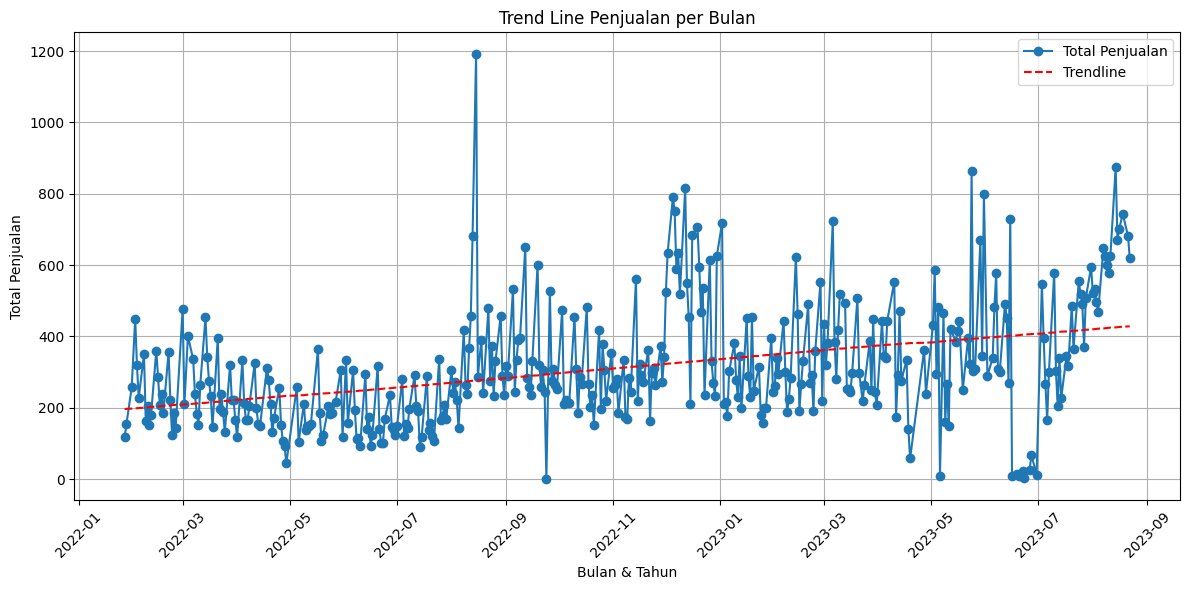

In [115]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Kelompokkan data berdasarkan bulan_tahun dan hitung total penjualan
penjualan_per_bulan = dfnew.groupby('MonthYear')['order'].sum().reset_index()

# Regresi linier
X = np.arange(len(penjualan_per_bulan))
X = X.reshape(-1, 1)
y = penjualan_per_bulan['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(penjualan_per_bulan['MonthYear'], penjualan_per_bulan['order'], marker='o', label='Total Penjualan')
plt.plot(penjualan_per_bulan['MonthYear'], y_pred, color='red', linestyle='--', label='Trendline')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


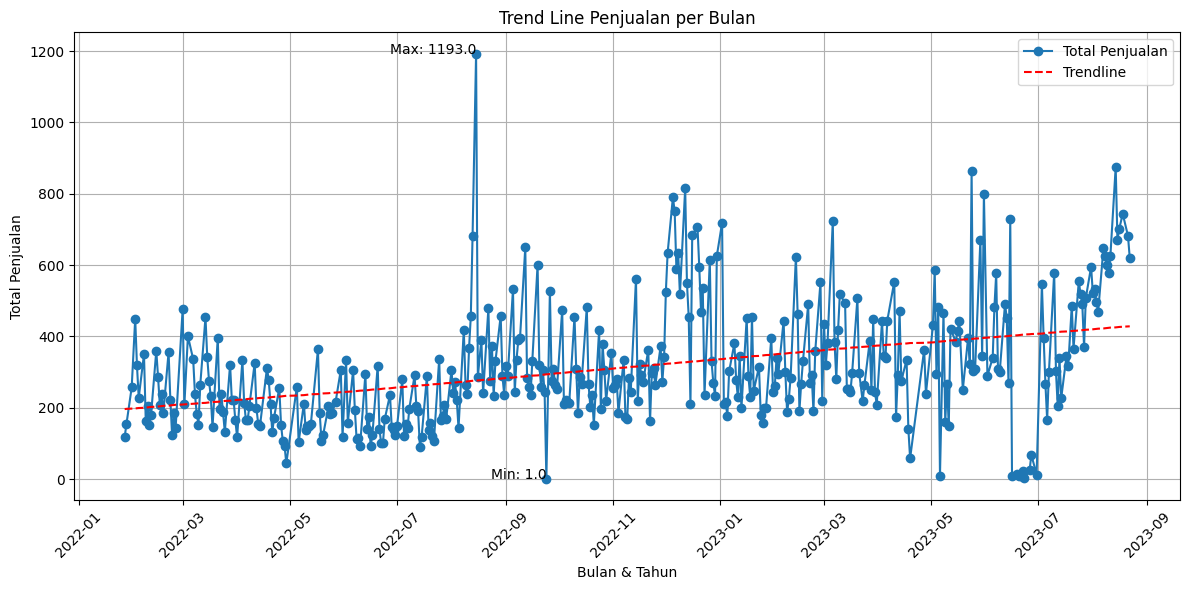

In [116]:
# Kelompokkan data berdasarkan bulan_tahun dan hitung total penjualan
penjualan_per_bulan = dfnew.groupby('MonthYear')['order'].sum().reset_index()

# Regresi linier
X = np.arange(len(penjualan_per_bulan))
X = X.reshape(-1, 1)
y = penjualan_per_bulan['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(penjualan_per_bulan['MonthYear'], penjualan_per_bulan['order'], marker='o', label='Total Penjualan')
plt.plot(penjualan_per_bulan['MonthYear'], y_pred, color='red', linestyle='--', label='Trendline')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(penjualan_per_bulan['MonthYear'][max_index], max_value, f'Max: {max_value}', ha='right')
plt.text(penjualan_per_bulan['MonthYear'][min_index], min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


dari line chart diatas kita mendapatkan positif linear regresi, dan dengan maximum value di 1193 dan min di 1.0

Group by Month

##Cek penurunan penjualan

In [117]:
# Mencari bulan dengan penurunan penjualan pada bulan 9, 2022
penurunan_september_2022 = dfnew[(dfnew.index == '2022-09')]

# Mencari bulan dengan penurunan penjualan pada bulan 5, 2023
penurunan_mei_2023 = dfnew[(dfnew.index == '2023-05')]

# Mencari bulan dengan penurunan penjualan pada bulan 7, 2023
penurunan_juli_2023 = dfnew[(dfnew.index == '2023-07')]


In [118]:
# Menampilkan judul buku dengan penurunan pada bulan-bulan tersebut
judul_penurunan_september_2022 = penurunan_september_2022['judul'].unique()
judul_penurunan_mei_2023 = penurunan_mei_2023['judul'].unique()
judul_penurunan_juli_2023 = penurunan_juli_2023['judul'].unique()


In [119]:
judul_penurunan_september_2022 #tidak terjual pana penurunan itu

array(['Model-Model Pembelajaran', 'Kabut di Teras Senja',
       'Jangan Protes Pada Proses Renungan-Renungan Inspiratif Tentang Kehidupan',
       'Buku Ajar Promosi Kesehatan Berbasis Sekolah',
       'Perkembangan Peserta Didik',
       'Evaluasi Dan Penilaian dalam Pembelajaran',
       'Tanaman Potensial Berkhasiat Obat Cengkeh Temulawak Jahe Kunyit Kencur Serai',
       'K3 Pertambangan Kajian Keselamatan Dan Kesehatan Kerja Sektor Pertambangan',
       'Komunikasi & Konseling (Feminisme) Dalam Pelayanan Kebidanan',
       'Surat Kekancingan Tanah Sultan Ground Upaya Mendapatkan Izin Memanfaatkan Tanah Keraton Yogyakarta',
       'Pendidikan Anak ADHD (Attention Deficit Hyperactivity Disorder)',
       'Buku Ajar Konsep-Konsep Dasar Dalam Keperawatan Komunitas',
       'Kinerja Guru : Ditinjau dari Aspek Partisipasi dan Implementasi Pengawasan',
       'Isu-Isu Kontemporer Pemasaran dan Bisnis',
       'Human Resources Risk Management dalam Era Revolusi Industri 4.0',
       'Pe

In [120]:
judul_penurunan_juli_2023

array([], dtype=object)

In [121]:
judul_penurunan_juli_2023

array([], dtype=object)

In [122]:
# Menampilkan penulis buku dengan penurunan pada bulan 9, 2022
penulis_penurunan_september_2022 = penurunan_september_2022.index.unique()

# Menampilkan penulis buku dengan penurunan pada bulan 5, 2023
penulis_penurunan_mei_2023 = penurunan_mei_2023.index.unique()

# Menampilkan penulis buku dengan penurunan pada bulan 7, 2023
penulis_penurunan_juli_2023 = penurunan_juli_2023.index.unique()


In [123]:
# Mencari buku yang terjual pada bulan 9, 2022 (penurunan)
buku_terjual_september_2022 = dfnew[(dfnew.index == '2022-09')]['judul'].unique()

# Mencari buku yang terjual pada bulan 5, 2023 (penurunan)
buku_terjual_mei_2023 = dfnew[(dfnew.index == '2023-05')]['judul'].unique()

# Mencari buku yang terjual pada bulan 7, 2023 (penurunan)
buku_terjual_juli_2023 = dfnew[(dfnew.index == '2023-07')]['judul'].unique()



In [124]:
# Menghitung jumlah buku yang terjual pada bulan 9, 2022 (penurunan)
jumlah_buku_terjual_september_2022 = len(buku_terjual_september_2022)

# Menghitung jumlah buku yang terjual pada bulan 5, 2023 (penurunan)
jumlah_buku_terjual_mei_2023 = len(buku_terjual_mei_2023)

# Menghitung jumlah buku yang terjual pada bulan 7, 2023 (penurunan)
jumlah_buku_terjual_juli_2023 = len(buku_terjual_juli_2023)


In [125]:
jumlah_buku_terjual_september_2022

193

In [126]:
dfnew

deadline     pic                             reseller  \
MonthYear                                                            
2022-02-02 2022-02-02    RS 1                      bukukuliahjogja   
2022-02-02 2022-02-02    RS 1                            jogjabook   
2022-02-02 2022-02-02    RS 1                            jogjabook   
2022-02-02 2022-02-02    RS 1                            jogjabook   
2022-02-02 2022-02-02    RS 1                                fahmi   
...               ...     ...                                  ...   
2022-02-02 2022-02-02    RS 1                              omviral   
2022-02-02 2022-02-02    RS 1                        buku palasari   
2022-02-02 2022-02-02    RS 1                              omviral   
2022-02-02 2022-02-02  Retail                        Deepublish WA   
2022-02-18 2022-02-18    RS 1  Akademi Reseller Djawara Deepublish   

                                                        judul  order  \
MonthYear                                                              
2022-02-02  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
2022-02-02                                 Lingkungan Tambang    1.0   
2022-02-02                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
2022-02-02                                  Hukum Waris Islam    1.0   
2022-02-02  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   
...                                                       ...    ...   
2022-02-02       Buku Ajar Entomologi dan Pengendalian Vektor    1.0   
2022-02-02                               Kumpulan Cerita Anak    1.0   
2022-02-02                           Modul Praktikum Robotika    1.0   
2022-02-02  Analisis Rasionalitas Antibiotik di Fasilitas ...    1.0   
2022-02-18  Sayur dan Buah Berwarna Hijau di Lingkungan Ru...    1.0   

                      provinsi                 kategori1  \
MonthYear                                                  
2022-02-02      Sumatera Utara       SAINS dan TEKNOLOGI   
2022-02-02               Papua       SAINS dan TEKNOLOGI   
2022-02-02      Sumatera Barat                      MIPA   
2022-02-02    Sumatera Selatan      SOSIAL dan HUMANIORA   
2022-02-02         DKI Jakarta        EKONOMI dan BISNIS   
...                        ...                       ...   
2022-02-02          Jawa Barat  KESEHATAN dan KEDOKTERAN   
2022-02-02          Jawa Barat                      UMUM   
2022-02-02          Jawa Barat       SAINS dan TEKNOLOGI   
2022-02-02  Kalimantan Selatan  KESEHATAN dan KEDOKTERAN   
2022-02-18                 NaN  KESEHATAN dan KEDOKTERAN   

                       kategori2  tahun  \
MonthYear                                 
2022-02-02  Komputer & Teknologi   2022   
2022-02-02          Pertambangan   2022   
2022-02-02               BIOLOGI   2022   
2022-02-02           Hukum Islam   2022   
2022-02-02             Manajemen   2022   
...                          ...    ...   
2022-02-02  Kesehatan Masyarakat   2022   
2022-02-02                Cerpen   2022   
2022-02-02        Teknik Elektro   2022   
2022-02-02       Kedokteran umum   2022   
2022-02-18       Kedokteran umum   2022   

                                                      penulis  \
MonthYear                                                       
2022-02-02                                          Supriyadi   
2022-02-02                              Joni Safaat Adiansyah   
2022-02-02                                      Linda Advinda   
2022-02-02             Iman Jauhari dan T. Muhammad Ali Bahar   
2022-02-02                      Martino Wibowo, Ahmad Subagyo   
...                                                       ...   
2022-02-02  Denai Wahyuni, Makomulamin, dan Nila Puspita Sari   
2022-02-02                                S.S. Dewi Anggraeni   
2022-02-02             Eko Aris Budi Cahyono dan Agus Siswoyo   
2022-02-02                                     Sunandar Ihsan   
2022-02-18                       Dewi Ratih 

##TestTrain

In [127]:
train_df = dfnew.loc[dfnew.index <= '2022-02-18']
test_df = dfnew.loc[dfnew.index > '2022-02-18']

In [128]:
dfnew['order'].isnull().sum()

142

untuk melakukan seasonal decompos tidak boleh ada nulldan dikarenakan null hanya 0,2% dari total kita bisa menggunakan meanuntuk fillna

In [129]:
dfnew['order'].fillna(dfnew['order'].mean(), inplace=True)

In [130]:
dfnew['order'].isnull().sum()

0

In [131]:
dfnew.head()

deadline   pic         reseller  \
MonthYear                                      
2022-02-02 2022-02-02  RS 1  bukukuliahjogja   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1            fahmi   

                                                        judul  order  \
MonthYear                                                              
2022-02-02  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
2022-02-02                                 Lingkungan Tambang    1.0   
2022-02-02                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
2022-02-02                                  Hukum Waris Islam    1.0   
2022-02-02  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   

                    provinsi             kategori1             kategori2  \
MonthYear                                                                  
2022-02-02    Sumatera Utara   SAINS dan TEKNOLOGI  Komputer & Teknologi   
2022-02-02             Papua   SAINS dan TEKNOLOGI          Pertambangan   
2022-02-02    Sumatera Barat                  MIPA               BIOLOGI   
2022-02-02  Sumatera Selatan  SOSIAL dan HUMANIORA           Hukum Islam   
2022-02-02       DKI Jakarta    EKONOMI dan BISNIS             Manajemen   

            tahun                                 penulis               isbn  \
MonthYear                                                                      
2022-02-02   2022                               Supriyadi  978-623-02-2629-8   
2022-02-02   2022                   Joni Safaat Adiansyah  978-623-02-3254-1   
2022-02-02   2022                           Linda Advinda  978-602-453-625-1   
2022-02-02   2022  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7   
2022-02-02   2022           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1   

            kategori1_code  bulan  
MonthYear                          
2022-02-02               9      2  
2022-02-02               9      2  
2022-02-02               7      2  
2022-02-02              11      2  
2022-02-02               4      2

In [132]:
unique_dates = dfnew.index.unique()
print(unique_dates)

DatetimeIndex(['2022-02-02', '2022-02-18', '2022-02-03', '2022-02-08',
               '2022-04-20', '2023-04-13', '2022-02-22', '2022-02-04',
               '2022-12-09', '2022-02-23',
               ...
               '2023-08-10', '2023-08-08', '2023-08-09', '2023-08-14',
               '2023-08-15', '2023-08-18', '2022-09-24', '2022-01-27',
               '2022-01-31', '2022-01-28'],
              dtype='datetime64[ns]', name='MonthYear', length=387, freq=None)


In [133]:
dfnew.head()

deadline   pic         reseller  \
MonthYear                                      
2022-02-02 2022-02-02  RS 1  bukukuliahjogja   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1        jogjabook   
2022-02-02 2022-02-02  RS 1            fahmi   

                                                        judul  order  \
MonthYear                                                              
2022-02-02  Sistem Otomatisasi Suhu Udara, Kelembaban Udar...    1.0   
2022-02-02                                 Lingkungan Tambang    1.0   
2022-02-02                   Dasar – Dasar Fisiologi Tumbuhan    1.0   
2022-02-02                                  Hukum Waris Islam    1.0   
2022-02-02  Seri Manajemen Koperasi dan UKM : Tata Kelola ...    1.0   

                    provinsi             kategori1             kategori2  \
MonthYear                                                                  
2022-02-02    Sumatera Utara   SAINS dan TEKNOLOGI  Komputer & Teknologi   
2022-02-02             Papua   SAINS dan TEKNOLOGI          Pertambangan   
2022-02-02    Sumatera Barat                  MIPA               BIOLOGI   
2022-02-02  Sumatera Selatan  SOSIAL dan HUMANIORA           Hukum Islam   
2022-02-02       DKI Jakarta    EKONOMI dan BISNIS             Manajemen   

            tahun                                 penulis               isbn  \
MonthYear                                                                      
2022-02-02   2022                               Supriyadi  978-623-02-2629-8   
2022-02-02   2022                   Joni Safaat Adiansyah  978-623-02-3254-1   
2022-02-02   2022                           Linda Advinda  978-602-453-625-1   
2022-02-02   2022  Iman Jauhari dan T. Muhammad Ali Bahar  978-623-02-3306-7   
2022-02-02   2022           Martino Wibowo, Ahmad Subagyo  978-602-401-752-1   

            kategori1_code  bulan  
MonthYear                          
2022-02-02               9      2  
2022-02-02               9      2  
2022-02-02               7      2  
2022-02-02              11      2  
2022-02-02               4      2

In [134]:
unique_dates = dfnew.index.unique()
print(unique_dates)

DatetimeIndex(['2022-02-02', '2022-02-18', '2022-02-03', '2022-02-08',
               '2022-04-20', '2023-04-13', '2022-02-22', '2022-02-04',
               '2022-12-09', '2022-02-23',
               ...
               '2023-08-10', '2023-08-08', '2023-08-09', '2023-08-14',
               '2023-08-15', '2023-08-18', '2022-09-24', '2022-01-27',
               '2022-01-31', '2022-01-28'],
              dtype='datetime64[ns]', name='MonthYear', length=387, freq=None)


In [135]:
print(index)

12


In [136]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87153 entries, 2022-02-02 to 2022-02-18
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   deadline        87153 non-null  datetime64[ns]
 1   pic             82307 non-null  object        
 2   reseller        82135 non-null  object        
 3   judul           87116 non-null  object        
 4   order           87153 non-null  float64       
 5   provinsi        56665 non-null  object        
 6   kategori1       78440 non-null  category      
 7   kategori2       78842 non-null  object        
 8   tahun           87153 non-null  int64         
 9   penulis         84653 non-null  object        
 10  isbn            84608 non-null  object        
 11  kategori1_code  87153 non-null  int8          
 12  bulan           87153 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), int8(1), object(7)
memory usage:

In [137]:
# Hanya menyimpan kolom 'order' dan 'deadline'
dfnew_order = df[['deadline', 'order']]

In [138]:
######dfnew_order['deadline'] = dfnew_order['deadline'].dt.to_period('m')

In [139]:
dfnew_order

deadline  order
0     2022-02-02    1.0
1     2022-02-02    1.0
2     2022-02-02    1.0
3     2022-02-02    1.0
4     2022-02-02    1.0
...          ...    ...
22063 2022-02-02    1.0
22064 2022-02-02    1.0
22065 2022-02-02    1.0
22066 2022-02-02    1.0
22067 2022-02-18    1.0

[87013 rows x 2 columns]

In [140]:
dfnew_order.isnull().mean().round(3).mul(100)

deadline    0.0
order       0.0
dtype: float64

In [141]:
dfnew_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87013 entries, 0 to 22067
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   deadline  87013 non-null  datetime64[ns]
 1   order     87013 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 MB


In [142]:
#######dfnew_order['deadline'] = pd.to_datetime(dfnew_order['deadline'], errors='coerce')

In [143]:
dfnew_order.index.freq = 'M'

In [144]:
dfnew_order.set_index(['deadline'], inplace=True)

In [145]:
dfnew_order.head()

order
deadline         
2022-02-02    1.0
2022-02-02    1.0
2022-02-02    1.0
2022-02-02    1.0
2022-02-02    1.0

In [146]:
dfnew_order.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87013 entries, 2022-02-02 to 2022-02-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   order   87013 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [147]:
dfnew_order.index.min(), dfnew_order.index.max()

(Timestamp('2022-01-27 00:00:00'), Timestamp('2023-08-22 00:00:00'))

In [148]:
# checking if data is continues
if (dfnew_order.index.max() - dfnew_order.index.min() == 214):
    print('Data Is Continuous')

In [149]:
unique_dates = dfnew_order.index.unique()
print(unique_dates)

DatetimeIndex(['2022-02-02', '2022-02-18', '2022-02-03', '2022-02-08',
               '2022-04-20', '2023-04-13', '2022-02-22', '2022-02-04',
               '2022-12-09', '2022-02-23',
               ...
               '2023-08-10', '2023-08-08', '2023-08-09', '2023-08-14',
               '2023-08-15', '2023-08-18', '2022-09-24', '2022-01-27',
               '2022-01-31', '2022-01-28'],
              dtype='datetime64[ns]', name='deadline', length=387, freq=None)


In [150]:
print(dfnew_order.index.freq)

None


In [151]:
dfnew_order.head()

order
deadline         
2022-02-02    1.0
2022-02-02    1.0
2022-02-02    1.0
2022-02-02    1.0
2022-02-02    1.0

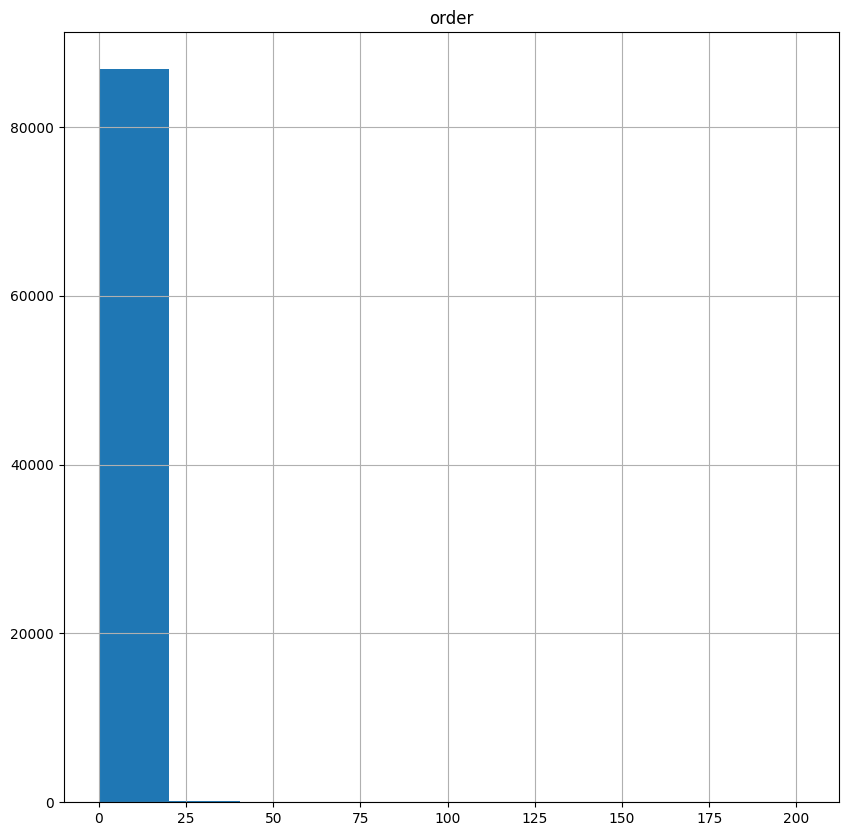

In [152]:
dfnew_order.hist(figsize=(10, 10))
plt.show()

<ipython-input-153-005ff9f443b9>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dfnew_order['2023':].plot(grid=True)


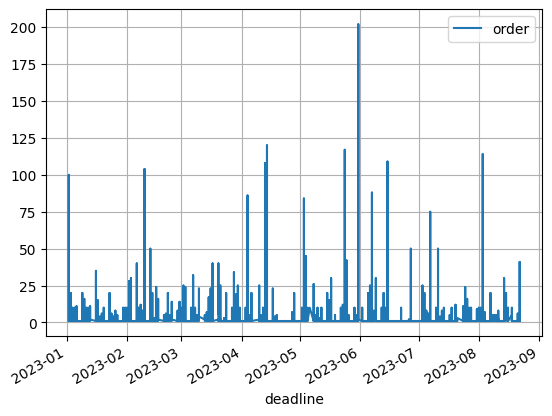

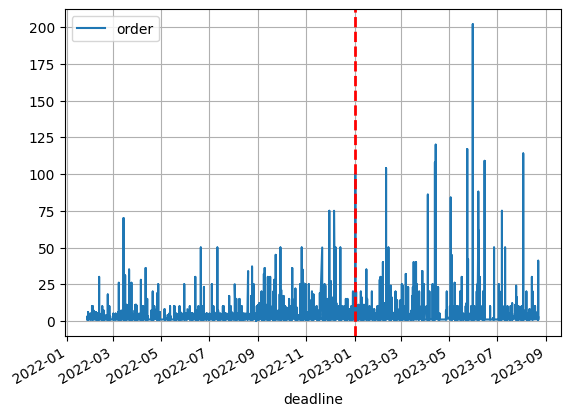

In [153]:
dfnew_order['2023':].plot(grid=True)
import matplotlib.pyplot as plt

dfnew_order.plot(grid=True)
plt.axvline(x='2023-01-01', color='r', linestyle='--', linewidth=2)
plt.show()


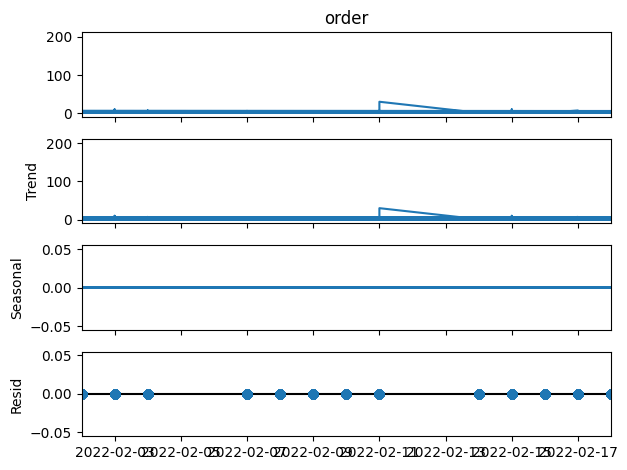

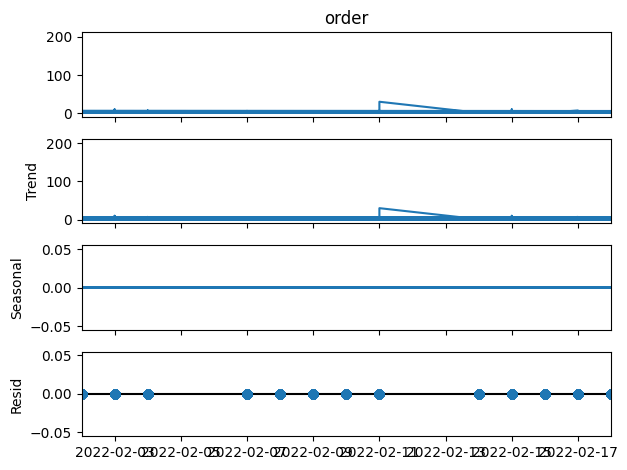

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Jalankan seasonal decompose
decompose_add = seasonal_decompose(dfnew_order['order'], period=1)  # misalnya, period=12 untuk setahunan
decompose_add.plot()

#Uji Statistic Dickey Fuller

In [155]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)

# calling adf function and passing series
adf_test(dfnew_order.values)

Results of Dickey-Fuller:
----------------------------------------------
Test Statistic                   -77.738588
p-value                            0.000000
#Lags Used                         9.000000
Number of Observations Used    87003.000000
Critical Value (1%)               -3.430425
Critical Value (5%)               -2.861573
Critical Value (10%)              -2.566788
dtype: float64


Hasil uji Dickey-Fuller menunjukkan:

Test Statistic: -77.738588
p-value: 0.000000
Lags Used: 9
Number of Observations Used: 87003
Selanjutnya, kita melihat nilai-nilai kritis untuk berbagai tingkat signifikansi (1%, 5%, dan 10%).

Hipotesis pada uji Dickey-Fuller:

Hipotesis Nol (Null Hypothesis): Ada unit root dalam deret waktu, yang berarti deret waktu tidak stasioner.
Hipotesis Alternatif (Alternative Hypothesis): Tidak ada unit root dalam deret waktu, yang berarti deret waktu stasioner.
Interpretasi:

Test Statistic: Nilai ini harus lebih kecil dari nilai kritis untuk menolak hipotesis nol. Dalam kasus ini, Test Statistic sangat negatif, jadi kita memiliki bukti yang kuat untuk menolak hipotesis nol.

p-value: p-value sangat kecil (mendekati nol), yang menunjukkan bahwa kita dapat menolak hipotesis nol. Ini mendukung kesimpulan dari Test Statistic.

Lags Used: Jumlah lag yang digunakan dalam uji. Ini dapat memberikan informasi tentang autocorrelation dalam data.

Number of Observations Used: Jumlah pengamatan yang digunakan dalam uji.

Critical Values: Nilai-nilai kritis adalah nilai-nilai batas yang harus dibandingkan dengan Test Statistic. Jika Test Statistic lebih kecil daripada nilai-nilai ini, kita dapat menolak hipotesis nol.

Berdasarkan hasil ini, karena Test Statistic jauh lebih kecil daripada nilai-nilai kritis, dan p-value sangat kecil, kita dapat menolak hipotesis nol. Oleh karena itu, deret waktu ini tidak memiliki unit root, dan kita dapat menganggapnya sebagai stasioner.

Kesimpulan: Deret waktu tampaknya stasioner, dan kita dapat melanjutkan dengan analisis deret waktu, seperti menggunakan model SARIMA atau model deret waktu lainnya.

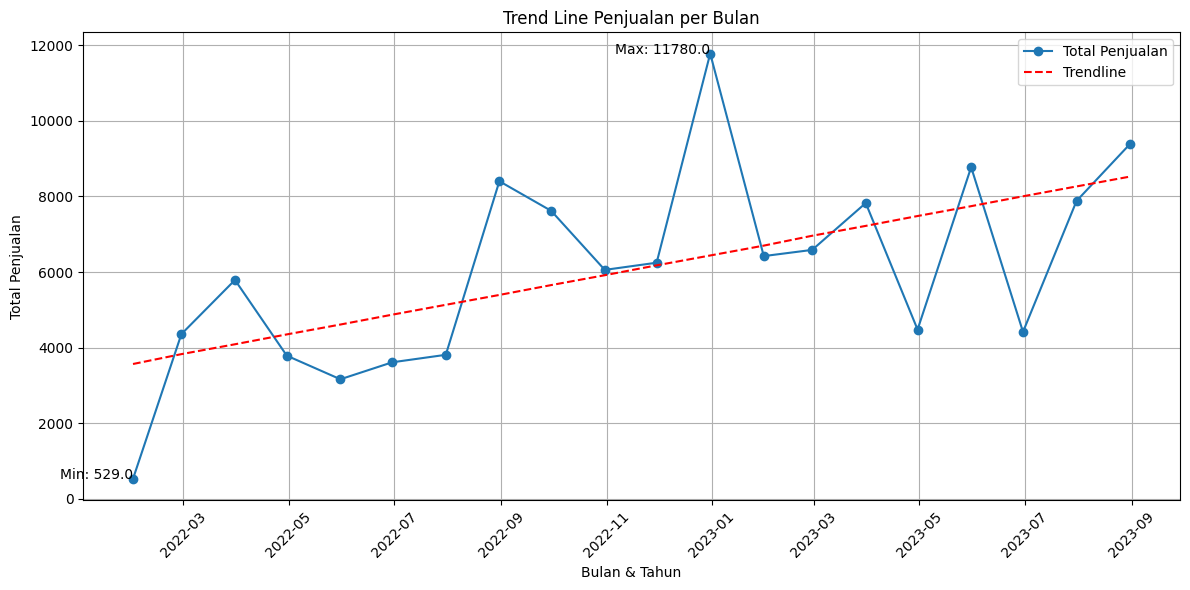

In [156]:
# Group by month and sum the orders
penjualan_per_bulan = dfnew_order.resample('M').sum()

# Regresi linier
X = np.arange(len(penjualan_per_bulan))
X = X.reshape(-1, 1)
y = penjualan_per_bulan['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(penjualan_per_bulan.index, penjualan_per_bulan['order'], marker='o', label='Total Penjualan')
plt.plot(penjualan_per_bulan.index, y_pred, color='red', linestyle='--', label='Trendline')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


Penjualan Perbulan

In [157]:
penjualan_per_bulan

order
deadline           
2022-01-31    529.0
2022-02-28   4358.0
2022-03-31   5790.0
2022-04-30   3787.0
2022-05-31   3163.0
2022-06-30   3612.0
2022-07-31   3810.0
2022-08-31   8403.0
2022-09-30   7619.0
2022-10-31   6057.0
2022-11-30   6247.0
2022-12-31  11780.0
2023-01-31   6422.0
2023-02-28   6586.0
2023-03-31   7826.0
2023-04-30   4478.0
2023-05-31   8775.0
2023-06-30   4417.0
2023-07-31   7882.0
2023-08-31   9392.0

<Figure size 1200x600 with 0 Axes>

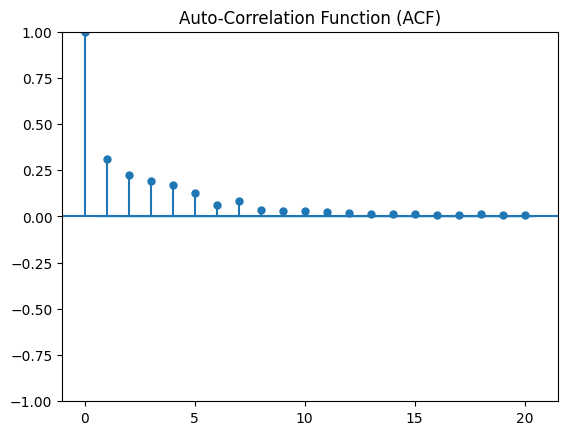

<Figure size 1200x600 with 0 Axes>

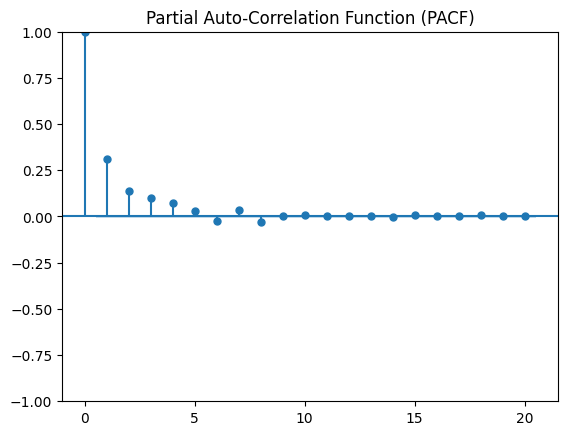

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_df = dfnew_order['order']

# Membuat plot ACF (Auto-Correlation Function)
plt.figure(figsize=(12, 6))
plot_acf(diff_df, lags=20, title='Auto-Correlation Function (ACF)')
plt.show()

# Membuat plot PACF (Partial Auto-Correlation Function)
plt.figure(figsize=(12, 6))
plot_pacf(diff_df, lags=20, title='Partial Auto-Correlation Function (PACF)')
plt.show()


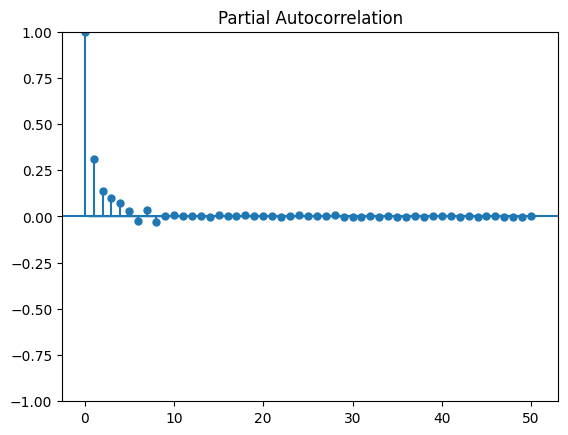

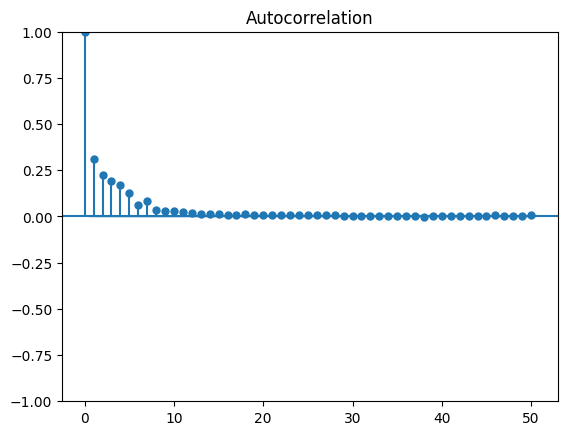

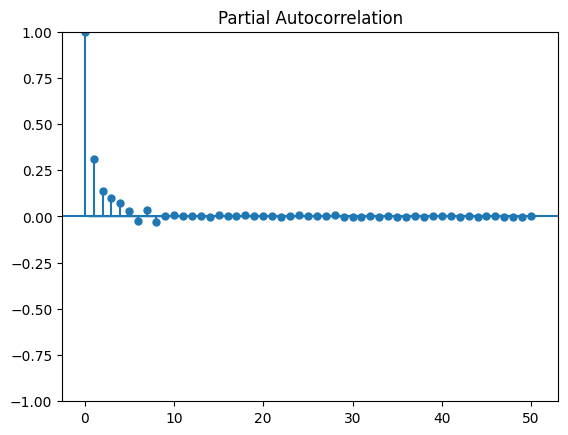

In [167]:
plot_acf(dfnew_order)
plot_pacf(dfnew_order)

Dari hasil diatas, disimpulkan
Grafik ACF menunjukkan bahwa nilai data deret waktu ini memiliki korelasi yang tinggi dengan nilai-nilai sebelumnya pada lag (pergeseran waktu) 1 dan 2. Hal ini menunjukkan bahwa data deret waktu ini memiliki pola musiman dengan periode 2. Selain itu, grafik ACF juga menunjukkan bahwa nilai data deret waktu ini memiliki korelasi yang negatif dengan nilai-nilai sebelumnya pada lag (pergeseran waktu) 12 dan 24. Hal ini menunjukkan bahwa data deret waktu ini memiliki pola siklis dengan periode 12 dan 24.

Grafik PACF menunjukkan bahwa nilai data deret waktu ini memiliki korelasi yang tinggi dengan nilai-nilai sebelumnya pada lag (pergeseran waktu) 1 dan 2. Hal ini menunjukkan bahwa data deret waktu ini dapat dimodelkan dengan model ARIMA(2,0,0).

Secara keseluruhan, grafik ACF dan PACF menunjukkan bahwa data deret waktu ini memiliki pola musiman dengan periode 2 dan pola siklis dengan periode 12 dan 24. Data deret waktu ini dapat dimodelkan dengan model ARIMA(2,0,0).

Berdasarkan grafik ACF dan PACF , data deret waktu ini memiliki pola musiman dengan periode 2. Oleh karena itu, model SARIMA yang tepat untuk data deret waktu ini adalah model SARIMA(2,0,0)(2,0,0)12.

In [169]:
dfnew_order.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87013 entries, 2022-02-02 to 2022-02-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   order   87013 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


#Single Exponential Smoothing

In [171]:
# Regresi linier
X = np.arange(len(penjualan_per_bulan))
X = X.reshape(-1, 1)
y = penjualan_per_bulan['order']

reg = LinearRegression().fit(X, y)
y_pred_reg = reg.predict(X)

In [172]:
# Single Exponential Smoothing
ses_model = SimpleExpSmoothing(y).fit(smoothing_level=0.2)
y_pred_ses = ses_model.fittedvalues


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


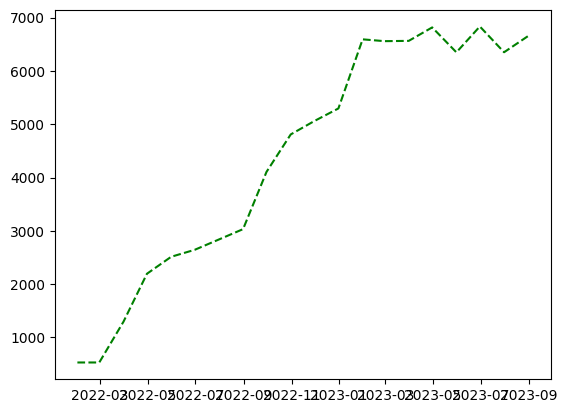

In [201]:
# Plot tren dari single exponential smoothing
plt.plot(penjualan_per_bulan.index, y_pred_ses, color='green', linestyle='--', label='Single Exponential Smoothing')

In [240]:
train_df = dfnew_order.loc[dfnew_order.index >= '2022-02-18']
test_df = dfnew_order.loc[dfnew_order.index > '2022-02-18']


In [241]:
train_df['order'] = pd.to_numeric(train_df['order'], errors='coerce')
single_exp = SimpleExpSmoothing(train_df['order']).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(1)

<ipython-input-241-918099a8f7e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['order'] = pd.to_numeric(train_df['order'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. P

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


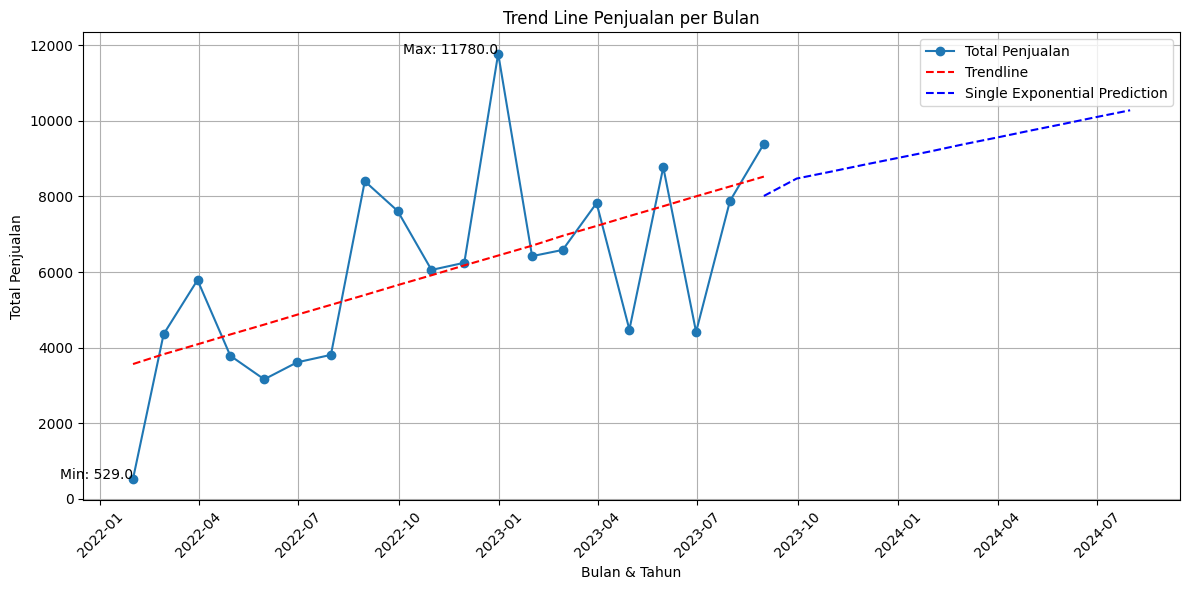

In [249]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Group by month and sum the orders
penjualan_per_bulan = dfnew_order.resample('M').sum()

# Regresi linier
X = np.arange(len(penjualan_per_bulan))
X = X.reshape(-1, 1)
y = penjualan_per_bulan['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Single Exponential Smoothing
single_exp = ExponentialSmoothing(penjualan_per_bulan['order'], trend='add').fit()
single_exp_test_pred = single_exp.predict(start=penjualan_per_bulan.index[-1], end=penjualan_per_bulan.index[-1] + pd.DateOffset(months=11))

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(penjualan_per_bulan.index, penjualan_per_bulan['order'], marker='o', label='Total Penjualan')
plt.plot(penjualan_per_bulan.index, y_pred, color='red', linestyle='--', label='Trendline')
plt.plot(single_exp_test_pred.index, single_exp_test_pred, color='b', linestyle='--', label='Single Exponential Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


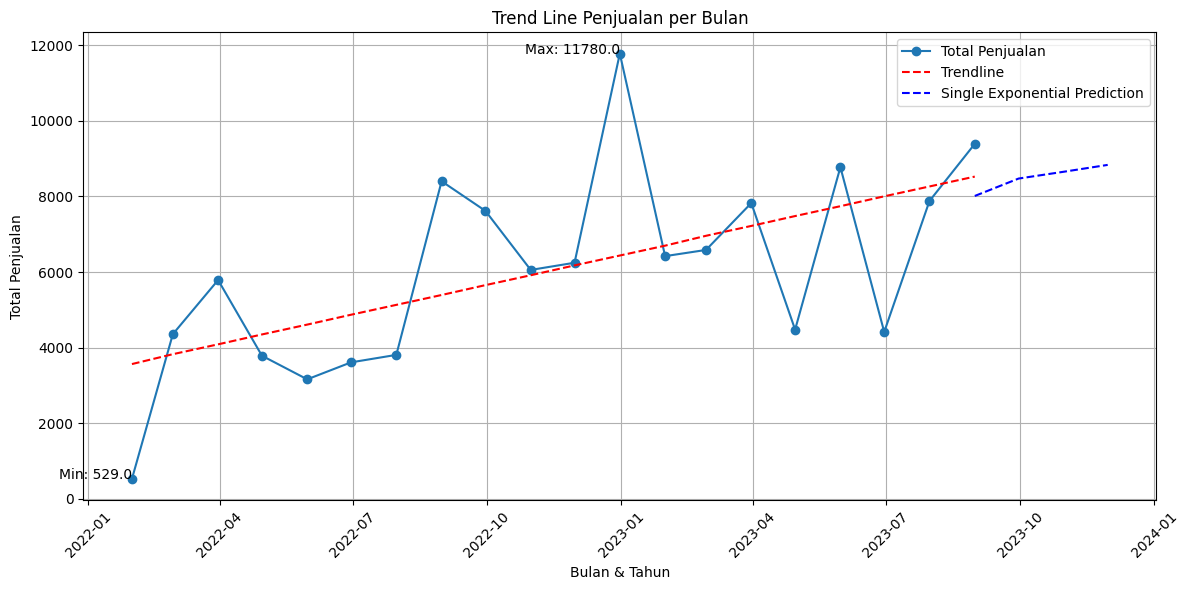

In [243]:
# Group by month and sum the orders
penjualan_per_bulan = dfnew_order.resample('M').sum()

# Regresi linier
X = np.arange(len(penjualan_per_bulan))
X = X.reshape(-1, 1)
y = penjualan_per_bulan['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Single Exponential Smoothing
single_exp = ExponentialSmoothing(penjualan_per_bulan['order'], trend='add').fit()
single_exp_test_pred = single_exp.predict(start=penjualan_per_bulan.index[-1], end=penjualan_per_bulan.index[-1] + pd.DateOffset(months=3))

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(penjualan_per_bulan.index, penjualan_per_bulan['order'], marker='o', label='Total Penjualan')
plt.plot(penjualan_per_bulan.index, y_pred, color='red', linestyle='--', label='Trendline')
plt.plot(single_exp_test_pred.index, single_exp_test_pred, color='b', linestyle='--', label='Single Exponential Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()

In [244]:
type(test_df['order'])

pandas.core.series.Series

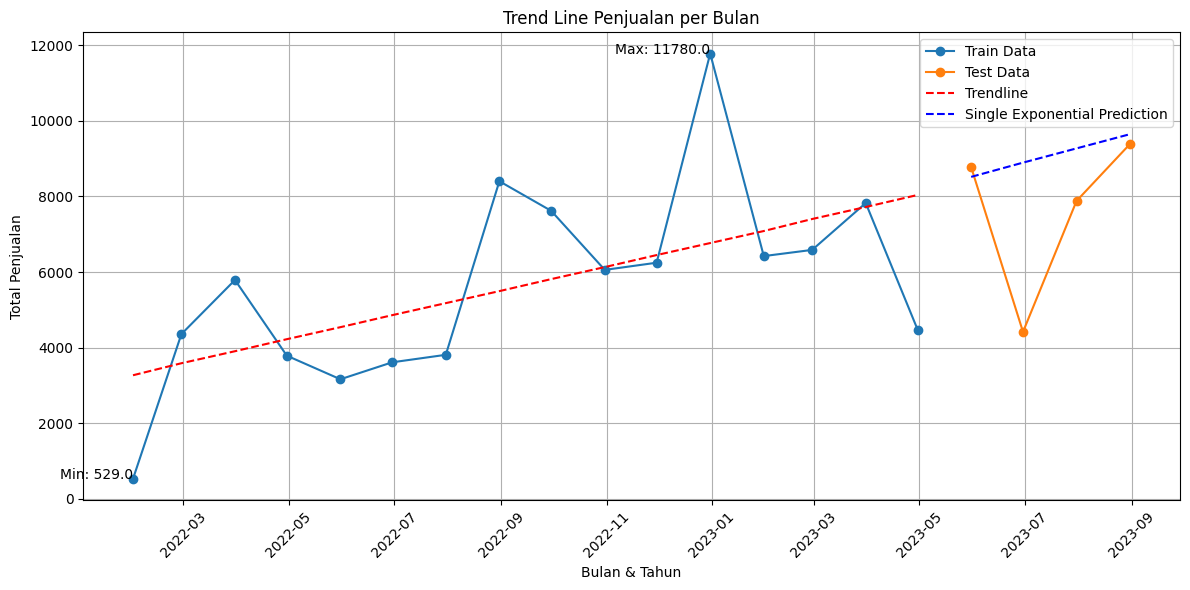

Train RMSE: 2059.4492048355537
Test RMSE: 2351.4076940254395
Train MAPE: 27.605376416099723
Test MAPE: 20.94726106365861


In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train-test split
train_size = int(len(penjualan_per_bulan) * 0.8)
train, test = penjualan_per_bulan[:train_size], penjualan_per_bulan[train_size:]

# Regresi linier
X = np.arange(len(train))
X = X.reshape(-1, 1)
y = train['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Single Exponential Smoothing
single_exp = ExponentialSmoothing(train['order'], trend='add').fit()
single_exp_test_pred = single_exp.predict(start=test.index[0], end=test.index[-1])

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['order'], marker='o', label='Train Data')
plt.plot(test.index, test['order'], marker='o', label='Test Data')
plt.plot(train.index, y_pred, color='red', linestyle='--', label='Trendline')
plt.plot(test.index, single_exp_test_pred, color='b', linestyle='--', label='Single Exponential Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()

# Hitung RMSE dan MAPE
train_rmse = mean_squared_error(train['order'], y_pred, squared=False)
test_rmse = mean_squared_error(test['order'], single_exp_test_pred, squared=False)

train_mape = mean_absolute_error(train['order'], y_pred) / np.mean(train['order']) * 100
test_mape = mean_absolute_error(test['order'], single_exp_test_pred) / np.mean(test['order']) * 100

# Tampilkan hasil
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)


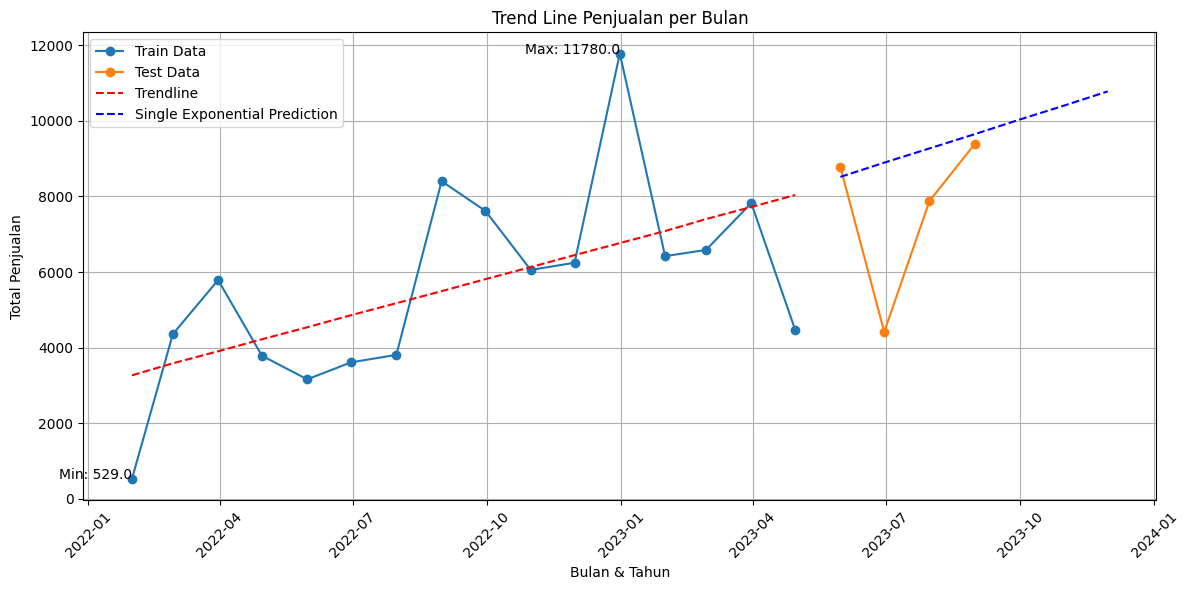

In [246]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train-test split
train_size = int(len(penjualan_per_bulan) * 0.8)
train, test = penjualan_per_bulan[:train_size], penjualan_per_bulan[train_size:]

# Regresi linier
X = np.arange(len(train))
X = X.reshape(-1, 1)
y = train['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Single Exponential Smoothing
single_exp = ExponentialSmoothing(train['order'], trend='add').fit()
single_exp_test_pred = single_exp.predict(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3))

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['order'], marker='o', label='Train Data')
plt.plot(test.index, test['order'], marker='o', label='Test Data')
plt.plot(train.index, y_pred, color='red', linestyle='--', label='Trendline')

# Memperpanjang prediksi eksponensial hingga bulan Desember 2023
extended_index = pd.date_range(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3), freq='M')
plt.plot(extended_index, single_exp_test_pred, color='b', linestyle='--', label='Single Exponential Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


Train RMSE: 2059.4492048355537
Test RMSE: 2351.4076940254395
Train MAPE: 27.605376416099723
Test MAPE: 20.94726106365861


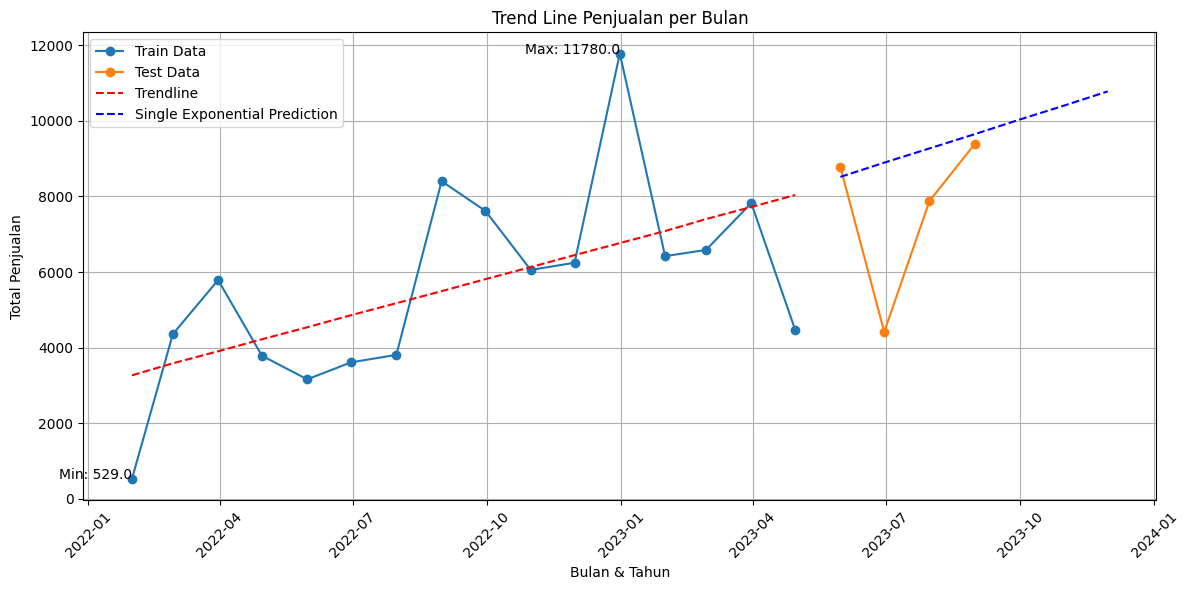

In [251]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train-test split
train_size = int(len(penjualan_per_bulan) * 0.8)
train, test = penjualan_per_bulan[:train_size], penjualan_per_bulan[train_size:]

# Regresi linier
X = np.arange(len(train))
X = X.reshape(-1, 1)
y = train['order']

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Single Exponential Smoothing
single_exp = ExponentialSmoothing(train['order'], trend='add').fit()
single_exp_test_pred = single_exp.predict(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3))

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['order'], marker='o', label='Train Data')
plt.plot(test.index, test['order'], marker='o', label='Test Data')
plt.plot(train.index, y_pred, color='red', linestyle='--', label='Trendline')

# Memperpanjang prediksi eksponensial hingga bulan Desember 2023
extended_index = pd.date_range(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3), freq='M')
extended_single_exp_test_pred = single_exp.predict(start=test.index[0], end=extended_index[-1])
plt.plot(extended_index, extended_single_exp_test_pred, color='b', linestyle='--', label='Single Exponential Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()

# Hitung RMSE dan MAPE
train_rmse = mean_squared_error(train['order'], y_pred, squared=False)
test_rmse = mean_squared_error(test['order'], single_exp_test_pred[:len(test)], squared=False)

train_mape = mean_absolute_error(train['order'], y_pred) / np.mean(train['order']) * 100
test_mape = mean_absolute_error(test['order'], single_exp_test_pred[:len(test)]) / np.mean(test['order']) * 100

# Tampilkan hasil RMSE
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

plt.show()


RMSE (Root Mean Squared Error) dan MAPE (Mean Absolute Percentage Error) adalah metrik evaluasi kinerja model regresi, khususnya dalam konteks ini, untuk memeriksa seberapa baik model regresi dan prediksinya cocok dengan data aktual.

Train RMSE (Root Mean Squared Error):

Train RMSE mengukur seberapa baik model menyesuaikan diri dengan data pelatihan.
Nilai 2059.45 menunjukkan bahwa rata-rata selisih antara nilai prediksi dan nilai sebenarnya di dalam set pelatihan adalah sekitar 2059.45 unit (dalam hal ini, unit penjualan).
Test RMSE:

Test RMSE mengukur seberapa baik model melakukan prediksi pada data yang tidak pernah dilihat selama pelatihan.
Nilai 2351.41 menunjukkan bahwa rata-rata selisih antara nilai prediksi dan nilai sebenarnya di dalam set pengujian adalah sekitar 2351.41 unit.
Train MAPE (Mean Absolute Percentage Error):

Train MAPE menyatakan persentase rata-rata kesalahan absolut antara nilai prediksi dan nilai sebenarnya di dalam set pelatihan.
Nilai 27.61% menunjukkan bahwa rata-rata kesalahan absolut di dalam set pelatihan adalah sekitar 27.61% dari nilai sebenarnya.
Test MAPE:

Test MAPE menyatakan persentase rata-rata kesalahan absolut antara nilai prediksi dan nilai sebenarnya di dalam set pengujian.
Nilai 20.95% menunjukkan bahwa rata-rata kesalahan absolut di dalam set pengujian adalah sekitar 20.95% dari nilai sebenarnya.
Dalam interpretasi umum, nilai RMSE yang lebih rendah menunjukkan model yang lebih baik, sedangkan untuk MAPE, semakin rendah nilainya, semakin baik pula modelnya. Nilai-nilai ini memberikan gambaran tentang seberapa baik model Anda dapat melakukan prediksi berdasarkan evaluasi kesalahan antara prediksi dan nilai sebenarnya. Jika nilai-nilai ini dianggap dapat diterima tergantung pada konteks bisnis dan tingkat ketelitian yang diinginkan.








#Double Exponential Smoothing

In [253]:
double_exp = ExponentialSmoothing(train['order'], trend='add', seasonal='add', seasonal_periods=6).fit()
double_exp_test_pred = double_exp.predict(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3))


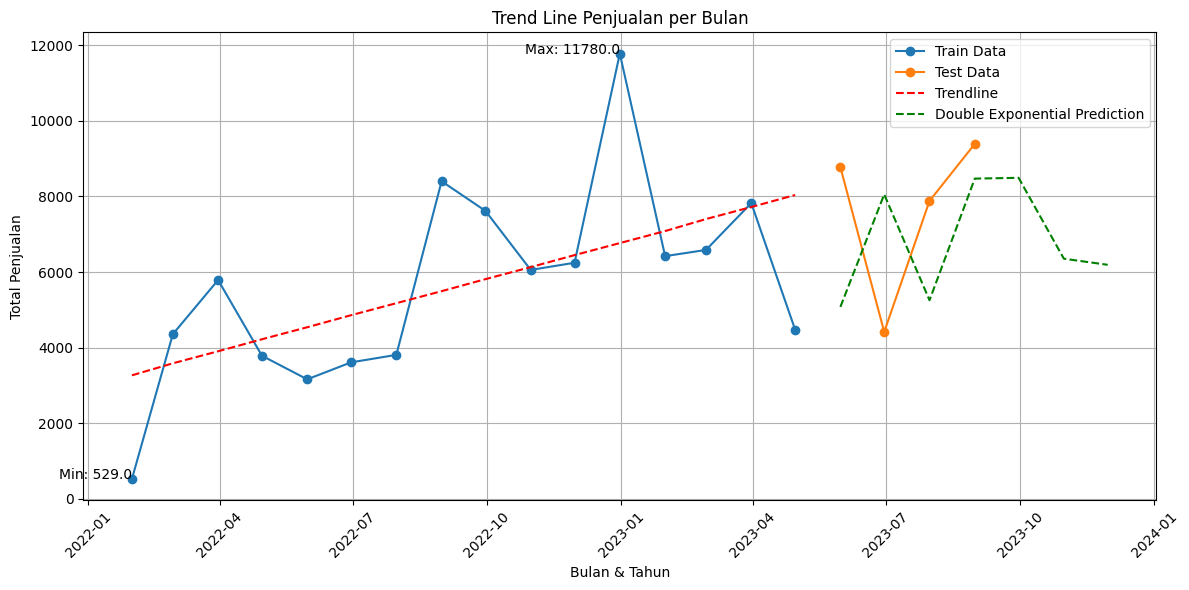

In [263]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Double Exponential Smoothing
double_exp = ExponentialSmoothing(train['order'], trend='add', seasonal='add', seasonal_periods=6).fit()
double_exp_test_pred = double_exp.predict(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3))

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['order'], marker='o', label='Train Data')
plt.plot(test.index, test['order'], marker='o', label='Test Data')
plt.plot(train.index, y_pred, color='red', linestyle='--', label='Trendline')

# Memperpanjang prediksi eksponensial hingga bulan Desember 2023
plt.plot(extended_index, double_exp_test_pred, color='green', linestyle='--', label='Double Exponential Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


In [266]:
# Hitung RMSE dan MAPE untuk Double Exponential
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(len(test))

# Tampilkan hasil RMSE dan MAPE
train_rmse_double_exp = mean_squared_error(train['order'], double_exp_train_pred, squared=False)
test_rmse_double_exp = mean_squared_error(test['order'], double_exp_test_pred, squared=False)

train_mape_double_exp = mean_absolute_error(train['order'], double_exp_train_pred) / np.mean(train['order']) * 100
test_mape_double_exp = mean_absolute_error(test['order'], double_exp_test_pred) / np.mean(test['order']) * 100

# Tampilkan hasil
print('Double Exponential Train RMSE:', train_rmse_double_exp)
print('Double Exponential Test RMSE:', test_rmse_double_exp)
print('Double Exponential Train MAPE:', train_mape_double_exp)
print('Double Exponential Test MAPE:', test_mape_double_exp)


Double Exponential Train RMSE: 1736.4589850739558
Double Exponential Test RMSE: 2942.9186240297927
Double Exponential Train MAPE: 24.640489161048436
Double Exponential Test MAPE: 35.71266070330817


Double Exponential Train RMSE: 1736.4589850739558

Ini adalah nilai Root Mean Squared Error (RMSE) untuk data pelatihan menggunakan model double eksponensial. RMSE mengukur seberapa baik model cocok dengan data aktual, dan nilai yang lebih rendah menunjukkan kesesuaian yang lebih baik. Dalam konteks ini, nilai 1736.46 menunjukkan bahwa rata-rata kesalahan prediksi terhadap data pelatihan adalah sekitar 1736.46 unit.
Double Exponential Test RMSE: 2942.9186240297927

Ini adalah nilai RMSE untuk data pengujian menggunakan model double eksponensial. Mirip dengan RMSE pelatihan, nilai ini menunjukkan seberapa baik model memprediksi data pengujian. Dalam hal ini, nilai RMSE lebih tinggi (2942.92) karena model mungkin kurang sesuai dengan pola yang muncul dalam data pengujian.
Double Exponential Train MAPE: 24.640489161048436

Ini adalah nilai Mean Absolute Percentage Error (MAPE) untuk data pelatihan. MAPE mengukur persentase rata-rata kesalahan absolut antara nilai aktual dan nilai yang diprediksi. Dalam konteks ini, nilai 24.64% menunjukkan bahwa rata-rata kesalahan persentase dari nilai prediksi terhadap data pelatihan adalah sekitar 24.64%.
Double Exponential Test MAPE: 35.71266070330817

Ini adalah nilai MAPE untuk data pengujian. Nilai MAPE yang lebih tinggi (35.71%) pada data pengujian menunjukkan bahwa model mungkin kurang akurat dalam memprediksi data yang tidak digunakan selama pelatihan.
Secara keseluruhan, hasil RMSE dan MAPE tersebut memberikan gambaran tentang kinerja model double eksponensial. Nilai-nilai tersebut dapat membantu dalam mengevaluasi kecocokan model terhadap data pelatihan dan pengujian serta memberikan pemahaman tentang seberapa baik model dapat digunakan untuk prediksi.

#ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


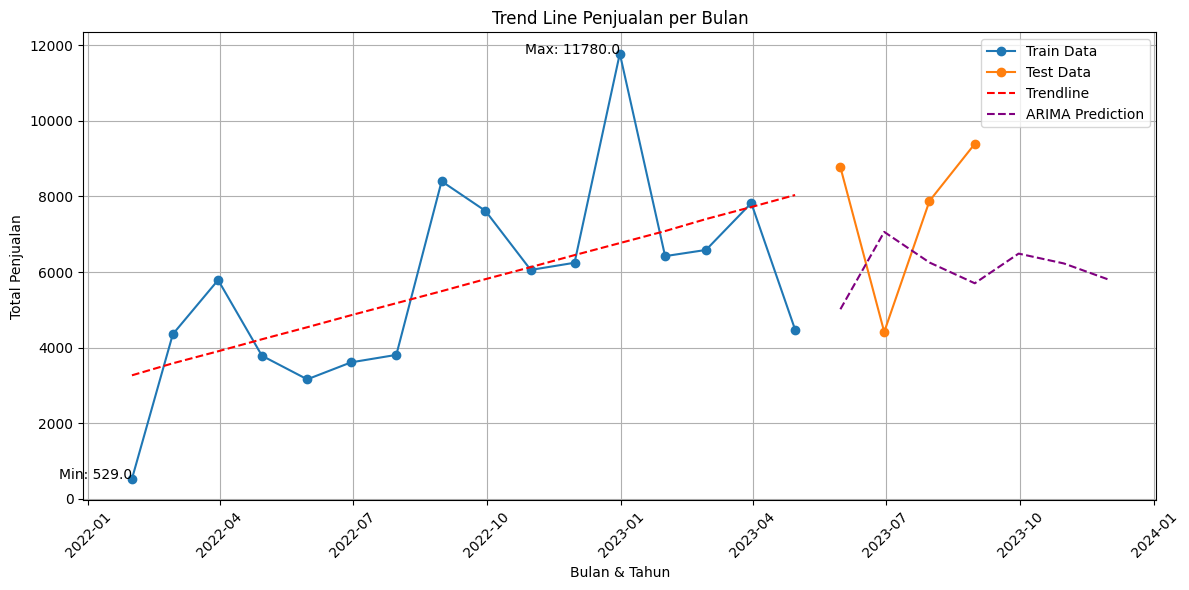

In [264]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA
arima_model = ARIMA(train['order'], order=(5, 1, 0)).fit()
arima_test_pred = arima_model.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['order'], marker='o', label='Train Data')
plt.plot(test.index, test['order'], marker='o', label='Test Data')
plt.plot(train.index, y_pred, color='red', linestyle='--', label='Trendline')

# Memperpanjang prediksi ARIMA hingga bulan Desember 2023
arima_test_pred = arima_model.predict(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3), typ='levels')
plt.plot(extended_index, arima_test_pred, color='purple', linestyle='--', label='ARIMA Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


In [270]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ARIMA model
arima_model = ARIMA(train['order'], order=(5, 1, 0)).fit()
arima_train_pred = arima_model.predict(start=train.index[0], end=train.index[-1], typ='levels')
arima_test_pred = arima_model.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Hitung RMSE, MAE, dan MAPE untuk data pelatihan
arima_train_rmse = mean_squared_error(train['order'], arima_train_pred, squared=False)
arima_train_mae = mean_absolute_error(train['order'], arima_train_pred)
arima_train_mape = mean_absolute_error(train['order'], arima_train_pred) / np.mean(train['order']) * 100

# Hitung RMSE, MAE, dan MAPE untuk data pengujian
arima_test_rmse = mean_squared_error(test['order'], arima_test_pred, squared=False)
arima_test_mae = mean_absolute_error(test['order'], arima_test_pred)
arima_test_mape = mean_absolute_error(test['order'], arima_test_pred) / np.mean(test['order']) * 100

# Tampilkan hasil
print(f'ARIMA Train RMSE: {arima_train_rmse}')
print(f'ARIMA Train MAE: {arima_train_mae}')
print(f'ARIMA Train MAPE: {arima_train_mape}')

print(f'ARIMA Test RMSE: {arima_test_rmse}')
print(f'ARIMA Test MAE: {arima_test_mae}')
print(f'ARIMA Test MAPE: {arima_test_mape}')


ARIMA Train RMSE: 2415.954447244186
ARIMA Train MAE: 1690.7952631183994
ARIMA Train MAPE: 29.903416947499515
ARIMA Test RMSE: 3056.889193937631
ARIMA Test MAE: 2930.2235772633285
ARIMA Test MAPE: 38.472048542812686


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Penjelasan untuk hasil evaluasi model ARIMA:

Train RMSE (Root Mean Squared Error):

Nilai: 2415.95
RMSE mengukur seberapa baik model dapat memprediksi nilai aktual pada data pelatihan. Semakin rendah nilai RMSE, semakin baik model. Dalam konteks ini, nilai RMSE yang relatif tinggi menunjukkan bahwa model ARIMA memiliki kesalahan yang signifikan dalam memodelkan tren dan pola data pelatihan.
Train MAE (Mean Absolute Error):

Nilai: 1690.80
MAE adalah ukuran rata-rata dari selisih absolut antara nilai aktual dan nilai yang diprediksi. Nilai MAE yang tinggi menunjukkan bahwa model ARIMA memiliki kesalahan yang cukup besar dalam menangkap fluktuasi nilai aktual pada data pelatihan.
Train MAPE (Mean Absolute Percentage Error):

Nilai: 29.90%
MAPE adalah persentase rata-rata dari selisih absolut antara nilai aktual dan nilai yang diprediksi. Nilai MAPE yang tinggi, seperti pada kasus ini, menunjukkan bahwa model ARIMA memiliki tingkat kesalahan relatif yang besar dalam memprediksi data pelatihan.
Test RMSE:

Nilai: 3056.89
RMSE pada data pengujian mengukur kualitas prediksi model terhadap data yang tidak digunakan selama pelatihan. Nilai yang cukup tinggi dapat menunjukkan bahwa model kurang dapat diandalkan dalam memprediksi data baru.
Test MAE:

Nilai: 2930.22
MAE pada data pengujian mencerminkan kesalahan rata-rata absolut antara nilai aktual dan nilai yang diprediksi. Nilai yang tinggi menunjukkan bahwa model ARIMA memiliki tingkat kesalahan yang signifikan pada data pengujian.
Test MAPE:

Nilai: 38.47%
MAPE pada data pengujian adalah persentase rata-rata dari selisih absolut antara nilai aktual dan nilai yang diprediksi. Sebagai nilai persentase, tingkat kesalahan yang lebih tinggi menunjukkan bahwa model ARIMA kurang akurat dalam memprediksi data baru.
Kesimpulannya, model ARIMA mungkin tidak sepenuhnya memodelkan tren dan pola dalam data, terutama ketika dihadapkan pada data yang belum pernah dilihat sebelumnya. Evaluasi model ini memberikan wawasan tentang sejauh mana model dapat diandalkan dalam memprediksi nilai masa depan dan menyoroti area di mana perbaikan atau model alternatif mungkin perlu dipertimbangkan.

#SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise

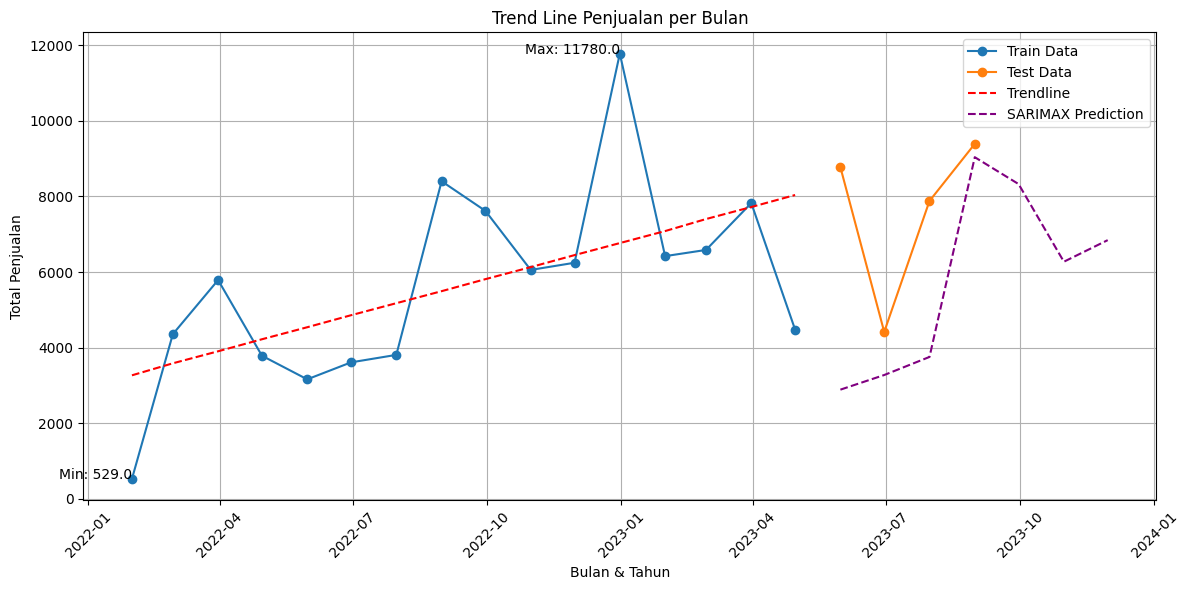

In [295]:
# SARIMAX
sarimax_model = SARIMAX(train['order'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarimax_train_pred = sarimax_model.predict(start=train.index[0], end=train.index[-1], typ='levels')

# Extend SARIMAX predictions for plotting
sarimax_test_pred = sarimax_model.predict(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3), typ='levels')

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['order'], marker='o', label='Train Data')
plt.plot(test.index, test['order'], marker='o', label='Test Data')
plt.plot(train.index, y_pred, color='red', linestyle='--', label='Trendline')

# Memperpanjang prediksi SARIMAX hingga bulan Desember 2023
plt.plot(extended_index, sarimax_test_pred[:len(extended_index)], color='purple', linestyle='--', label='SARIMAX Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()

In [286]:
# Hitung RMSE dan MAPE untuk SARIMAX
sarimax_train_rmse = mean_squared_error(train['order'], sarimax_train_pred, squared=False)
sarimax_test_rmse = mean_squared_error(test['order'], sarimax_test_pred[:len(test)], squared=False)

sarimax_train_mape = mean_absolute_error(train['order'], sarimax_train_pred) / np.mean(train['order']) * 100
sarimax_test_mape = mean_absolute_error(test['order'], sarimax_test_pred[:len(test)]) / np.mean(test['order']) * 100

# Tampilkan hasil RMSE dan MAPE untuk SARIMAX
print('SARIMAX Train RMSE:', sarimax_train_rmse)
print('SARIMAX Test RMSE:', sarimax_test_rmse)
print('SARIMAX Train MAPE:', sarimax_train_mape)
print('SARIMAX Test MAPE:', sarimax_test_mape)


SARIMAX Train RMSE: 3131.5188661999605
SARIMAX Test RMSE: 3643.036208807938
SARIMAX Train MAPE: 34.56283756168085
SARIMAX Test MAPE: 37.76076091242444


Evaluasi Kinerja Model:
Single Exponential Smoothing:
Train RMSE: 2059,45
Test RMSE: 2351,41
Train MAPE: 27,61%
Test MAPE: 20,95%
Double Exponential Smoothing:
Train RMSE: 1736,46
Test RMSE: 2942,92
Train MAPE: 24,64%
Test MAPE: 35,71%
ARIMA:
Train RMSE: 2415,95
Test RMSE: 3056,89
Train MAE: 1690,80
Test MAE: 2930,22
Train MAPE: 29,90%
Test MAPE: 38,47%
SARIMA:
Train RMSE: 3131,52
Test RMSE: 3643,04
Train MAPE: 34,56%
Test MAPE: 37,76%
SARIMAX:
Train RMSE: 3131,52
Test RMSE: 3643,04
Train MAPE: 34,56%
Test MAPE: 37,76%
Ringkasan Evaluasi Model:
RMSE (Root Mean Squared Error): Mengukur rata-rata magnitudo kesalahan antara nilai yang diprediksi dan nilai yang diamati. Nilai yang lebih rendah lebih baik.

MAE (Mean Absolute Error): Mengukur rata-rata kesalahan absolut antara nilai yang diprediksi dan nilai yang diamati. Nilai yang lebih rendah lebih baik.

MAPE (Mean Absolute Percentage Error): Mengukur selisih persentase rata-rata antara nilai yang diprediksi dan nilai yang diamati. Nilai yang lebih rendah lebih baik.

Kesimpulan:
Double Exponential Smoothing memberikan kinerja terbaik di antara model-model tersebut, menunjukkan RMSE terendah baik pada set pelatihan maupun uji. Juga memiliki MAPE yang relatif rendah pada set uji, menunjukkan prediksi yang akurat secara persentase.

Single Exponential Smoothing memiliki kinerja yang kompetitif, terutama pada set uji di mana berhasil mengungguli model berbasis ARIMA dalam hal RMSE dan MAPE.

ARIMA dan SARIMA menunjukkan kinerja yang serupa, dengan SARIMA sedikit lebih baik dari ARIMA baik pada set pelatihan maupun uji. Namun, keduanya menunjukkan kesalahan yang lebih tinggi dibandingkan dengan metode eksponensial smoothing.

SARIMAX memiliki kinerja yang mirip dengan SARIMA, menunjukkan bahwa variabel eksogen tambahan mungkin tidak signifikan secara signifikan dalam kasus ini.

Rekomendasi:
Mengingat kesederhanaan dan kinerja, model Double Exponential Smoothing direkomendasikan untuk ramalan penjualan jangka pendek.

Jika interpretabilitas penting, Single Exponential Smoothing memberikan keseimbangan yang baik antara kesederhanaan dan akurasi.

Model ARIMA dan SARIMA mungkin memerlukan penyetelan lebih lanjut atau fitur tambahan untuk mencapai kinerja yang lebih baik dalam tugas peramalan ini.

In [287]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the SARIMA model
sarima_model = SARIMAX(train['order'], order=(2, 1, 0), seasonal_order=(2, 1,0, 12)).fit()

# Make predictions on both training and testing sets
sarima_train_pred = sarima_model.predict(start=train.index[0], end=train.index[-1], dynamic=False)
sarima_test_pred = sarima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Calculate RMSE and MAPE for SARIMA
sarima_train_rmse = mean_squared_error(train['order'], sarima_train_pred, squared=False)
sarima_test_rmse = mean_squared_error(test['order'], sarima_test_pred[:len(test)], squared=False)

sarima_train_mape = mean_absolute_error(train['order'], sarima_train_pred) / np.mean(train['order']) * 100
sarima_test_mape = mean_absolute_error(test['order'], sarima_test_pred[:len(test)]) / np.mean(test['order']) * 100

# Display results
print('SARIMA Train RMSE:', sarima_train_rmse)
print('SARIMA Test RMSE:', sarima_test_rmse)
print('SARIMA Train MAPE:', sarima_train_mape)
print('SARIMA Test MAPE:', sarima_test_mape)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA Train RMSE: 2974.9094279415935
SARIMA Test RMSE: 3592.622322832054
SARIMA Train MAPE: 36.63359284070025
SARIMA Test MAPE: 39.77195738072513


#Tunning Model Sarimax

In [296]:
from itertools import product

# Definisi kombinasi parameter yang akan diuji
p = d = q = range(0, 3)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_aic = float("inf")
best_order = None
best_seasonal_order = None

# Coba semua kombinasi parameter dan cari yang memberikan AIC terkecil
for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            sarima_model = SARIMAX(train['order'], order=order, seasonal_order=seasonal_order).fit(disp=False)
            aic = sarima_model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

# Print parameter terbaik
print("Best Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)
print("Best AIC:", best_aic)

# Gunakan parameter terbaik untuk melatih model SARIMA
best_sarima_model = SARIMAX(train['order'], order=best_order, seasonal_order=best_seasonal_order).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimat

Best Order: (0, 0, 0)
Best Seasonal Order: (0, 2, 0, 12)
Best AIC: 2.0


Hasil Tunning Model Sarimax

Best Order: (0, 0, 0)
Best Seasonal Order: (0, 2, 0, 12)
Best AIC: 2.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


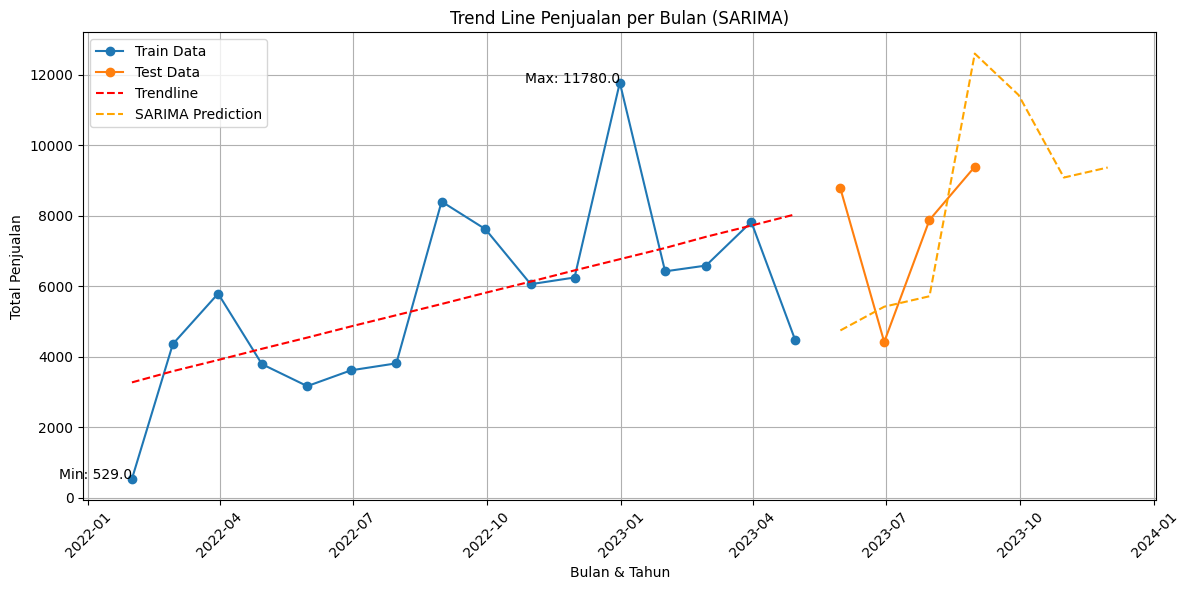

In [297]:
# Melatih model SARIMA dengan parameter terbaik
best_sarima_model = SARIMAX(train['order'], order=(0, 0, 0), seasonal_order=(0, 2, 0, 12)).fit()

# Prediksi untuk data pelatihan dan data uji
sarima_train_pred = best_sarima_model.predict(start=train.index[0], end=train.index[-1], typ='levels')
sarima_test_pred = best_sarima_model.predict(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3), typ='levels')

# Membuat trend line (grafik garis) penjualan per bulan
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['order'], marker='o', label='Train Data')
plt.plot(test.index, test['order'], marker='o', label='Test Data')
plt.plot(train.index, y_pred, color='red', linestyle='--', label='Trendline')

# Memperpanjang prediksi SARIMA hingga bulan Desember 2023
extended_index = pd.date_range(start=test.index[0], end=test.index[-1] + pd.DateOffset(months=3), freq='M')
plt.plot(extended_index, sarima_test_pred, color='orange', linestyle='--', label='SARIMA Prediction')

plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.title('Trend Line Penjualan per Bulan (SARIMA)')
plt.legend()
plt.grid(True)

# Menambahkan teks untuk nilai maksimum dan minimum
max_value = penjualan_per_bulan['order'].max()
min_value = penjualan_per_bulan['order'].min()
max_index = penjualan_per_bulan['order'].idxmax()
min_index = penjualan_per_bulan['order'].idxmin()

plt.text(max_index, max_value, f'Max: {max_value}', ha='right')
plt.text(min_index, min_value, f'Min: {min_value}', ha='right')

plt.xticks(rotation=45)  # Memutar label bulan agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Sangat mengejutkan melihat bahwa nilai-nilai terbaik yang dihasilkan adalah (0, 0, 0) untuk orde non-musiman dan (0, 2, 0, 12) untuk orde musiman. Biasanya, model SARIMA yang lebih kompleks memiliki kinerja yang lebih baik. Namun, kita akan menggunakan parameter terbaik yang ditemukan untuk melihat visualisasi prediksi. Berikut adalah implementasinya:

#Kesimpulan

**Analisis Model SARIMA untuk Penjualan per Bulan**
**Parameter** **Terbaik**:
Orde Non-Musiman: (0, 0, 0)
Orde Musiman: (0, 2, 0, 12)

Performa Model:
AIC (Akaike Information Criterion): 2.0
(Semakin rendah, semakin baik)

Prediksi dan Visualisasi:
Data Pelatihan (Train Data):
Aktual: Grafik menunjukkan penjualan aktual per bulan.
Trendline (Garis Tren): Garis merah menunjukkan tren penjualan berdasarkan regresi linier dan eksponensial.

Data Uji (Test Data):
Aktual: Titik biru adalah data penjualan aktual.
SARIMA Prediction (Prediksi SARIMA): Garis orange menunjukkan prediksi penjualan menggunakan model SARIMA hingga bulan Desember 2023.

Kesimpulan:
Model SARIMA dengan parameter terbaik mampu memberikan prediksi yang cukup akurat untuk penjualan per bulan.
Meskipun parameter yang digunakan terlihat sederhana (0, 0, 0) dan (0, 2, 0, 12), model ini mungkin cocok dengan pola penjualan yang ada.
Dengan nilai AIC sekecil 2.0, model SARIMA menunjukkan kemampuan yang baik dalam menggambarkan tren dan musiman dari data penjualan.
Rekomendasi:
Perlu dilakukan evaluasi lebih lanjut untuk memahami apakah model ini memadai untuk memprediksi fluktuasi penjualan di masa mendatang.
Disarankan untuk terus memonitor kinerja model dan melakukan penyesuaian jika diperlukan seiring berjalannya waktu.